<a href="https://colab.research.google.com/github/saintbenjamin/saintbenjamin.github.io/blob/main/%E9%87%8F%E5%AD%90%E8%A8%88%E7%AE%97%E5%85%A5%E9%96%80%E3%83%8F%E3%83%B3%E3%82%BA%E3%82%AA%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 量子計算入門ハンズオン

このノートは計算物理春の学校2024の共通講義「量子計算入門」の講義資料です。

ノートを編集して実行するには、メニュのファイル (File) → ドライブにコピーを保存 (Save a copy in Drive) から自分のノートを開いてください。

## QURI Partsの紹介

量子計算を記述するためのSDKは、各ハードウェアベンダーなどから様々提供されていますが、あるSDKで記述したアルゴリズムは、当然ながら別のSDKでは動きません。また目的の分野での量子アルゴリズムを記述するための、高度な機能がデフォルトで提供されているかどうかも、SDKによってまちまちです。QURI PartsはこうしたSDK間の差異を吸収し、共通したインタフェースで、高度な量子アルゴリズムを比較的容易に記述、実行できることを目的として開発されています。

QURI PartsはQunaSysでの研究開発のために開発されていますが、一部はオープンソース化されており、pipから簡単にインストールできます。興味を持たれた方は、講義後もQURI Partsで量子計算を楽しんでみてください。

このレクチャーでは量子回路の実行のためのバックエンドとして、[量子回路シミュレータQulacs](https://github.com/qulacs/qulacs)を使用しています。

(この講義資料は、[QURI Parts Tutorial](https://quri-parts.qunasys.com)および[Quantum Native Dojo](https://dojo.qulacs.org/ja/latest/index.html)の内容を一部改変して作成されています。)

# 環境構築

まずはQuri Partsをインストールします。以下のセルを順に実行していきましょう。(Shift + Enterで実行できます。）

In [ ]:
!python -m pip install quri-parts[qulacs] matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.4/834.4 kB 37.1 MB/s eta 0:00:00


```
Successfully installed ...
```

インストールが終わって上のようなメッセージが表示されたら、最初の量子回路を作ってみましょう。

In [ ]:
from math import pi
from quri_parts.circuit import QuantumCircuit

from quri_parts.circuit.utils.circuit_drawer import draw_circuit

circuit = QuantumCircuit(3)
circuit.add_RX_gate(0, pi/3)
circuit.add_H_gate(1)
circuit.add_CNOT_gate(1, 2)
circuit.add_CNOT_gate(0, 1)
circuit.add_H_gate(0)

draw_circuit(circuit)

   ___                     ___  
  |RX |                   | H | 
--|0  |-------------●-----|4  |-
  |___|             |     |___| 
   ___             _|_          
  | H |           |CX |         
--|1  |-----●-----|3  |---------
  |___|     |     |___|         
           _|_                  
          |CX |                 
----------|2  |-----------------
          |___|                 


```
   ___                     ___  
  |RX |                   | H |
--|0  |-------------●-----|4  |-
  |___|             |     |___|
   ___             _|_          
  | H |           |CX |         
--|1  |-----●-----|3  |---------
  |___|     |     |___|         
           _|_                  
          |CX |                 
----------|2  |-----------------
          |___|             
```

上のような回路が表示されたでしょうか? これで準備は終わりです。上手く行っていない場合は、手を上げて教えてください。

# 第1章 量子ゲートと量子回路


現在の量子計算では、量子ビットに作用する量子ゲートを並べて量子回路を構成し、実行、測定することが必要です。

Q#やSilqのような高級言語も幾つか提案されていますが、量子ゲートは意識する必要があります。将来的にはより高級な表現で量子計算を記述することが一般的になる可能性もありますが、未来はまだわかりません。

ここでは、QURI Partsで量子ゲートや量子回路をどのように扱うのか見て行きましょう。

## QuantumGateオブジェクト

QURI Partsでは量子ゲートは`QuantumGate`オブジェクトとして表現されています。`QuantumGate`オブジェクトは、ゲートの種類や、パラメータ、作用対象の量子ビットの情報などを持っています。

In [ ]:
from quri_parts.circuit import X, RX, CNOT

gates = [
    # 量子ビット0に作用するXゲート
    X(0),
    # 量子ビット1に作用する角度pi/3の回転ゲート
    RX(1, pi/3),
    # 量子ビット2 (制御) と量子ビット1 (ターゲット) に作用するCNOTゲート
    CNOT(2, 1),
]

for gate in gates:
    print(gate)

QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())


ゲートオブジェクトの情報は以下のように参照できます。(設定はできません。)

In [ ]:
from quri_parts.circuit import PauliRotation

x_gate = X(0)
print(f"name: {x_gate.name}, target: {x_gate.target_indices}")

rx_gate = RX(1, pi/3)
print(f"name: {rx_gate.name}, target: {rx_gate.target_indices}, angle: {rx_gate.params[0]}")

cnot_gate = CNOT(2, 1)
print(f"name: {cnot_gate.name}, control: {cnot_gate.control_indices}, target: {cnot_gate.target_indices}")

pauli_rot_gate = PauliRotation(target_indices=(0, 1, 2), pauli_ids=(1, 2, 3), angle=pi/3)
print(f"name: {pauli_rot_gate.name}, target: {pauli_rot_gate.target_indices}, pauli_ids: {pauli_rot_gate.pauli_ids}, angle: {pauli_rot_gate.params[0]}")

name: X, target: (0,)
name: RX, target: (1,), angle: 1.0471975511965976
name: CNOT, control: (2,), target: (1,)
name: PauliRotation, target: (0, 1, 2), pauli_ids: (1, 2, 3), angle: 1.0471975511965976


## QuantumCircuitオブジェクト

QURI Partsでは、以下のように、回路で使用される量子ビット数を指定して、量子回路を作成します。

In [ ]:
from quri_parts.circuit import QuantumCircuit

# 3量子ビットの回路を作成
circuit = QuantumCircuit(3)
# QuantumGateオブジェクトを作成してから回路に追加
circuit.add_gate(X(0))
# 各ゲート追加用のメソッドを使用
circuit.add_X_gate(0)
circuit.add_RX_gate(1, pi/3)
circuit.add_CNOT_gate(2, 1)
circuit.add_PauliRotation_gate(target_qubits=(0, 1, 2), pauli_id_list=(1, 2, 3), angle=pi/3)

`QuantumCircuit`オブジェクトには幾つかのプロパティがあります。

In [ ]:
print("Qubit count:", circuit.qubit_count)
print("Circuit depth:", circuit.depth)

gates = circuit.gates # .gatesプロパティは回路に含まれるゲートのSequenceを返します
print("# of gates in the circuit:", len(gates))
for gate in gates:
    print(gate)

Qubit count: 3
Circuit depth: 3
# of gates in the circuit: 5
QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='PauliRotation', target_indices=(0, 1, 2), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(1, 2, 3), unitary_matrix=())


量子ビット数が同じ`QuantumCircuit`オブジェクト同士は連結することができます。

In [ ]:
circuit2 = QuantumCircuit(3)
circuit2.add_Y_gate(1)
circuit2.add_H_gate(2)

combined = circuit + circuit2 # 右の処理と同等: combined = circuit.combine(circuit2)
print("Combined circuit:", combined.gates)

circuit2 += circuit # 右の処理と同等: circuit2.extend(circuit)
print("Extended circuit:", circuit2.gates)

Combined circuit: (QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='X', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='RX', target_indices=(1,), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(), unitary_matrix=()), QuantumGate(name='CNOT', target_indices=(1,), control_indices=(2,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='PauliRotation', target_indices=(0, 1, 2), control_indices=(), classical_indices=(), params=(1.0471975511965976,), pauli_ids=(1, 2, 3), unitary_matrix=()), QuantumGate(name='Y', target_indices=(1,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='H', target_indices=(2,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()))
Ext

## 回路の変換

QURI Partsで作成した回路は、バックエンドのシミュレータや実機の回路に変換することができます。例えばQulacsの回路を直接使用したい場合には、`quri_parts.qulacs.circuit.convert_circuit`関数が利用できます。

In [ ]:
from quri_parts.qulacs.circuit import convert_circuit
qulacs_circuit = convert_circuit(circuit)
print(qulacs_circuit)

import qulacs
qulacs_state = qulacs.QuantumState(3)
qulacs_circuit.update_quantum_state(qulacs_state)
print(qulacs_state)

*** Quantum Circuit Info ***
# of qubit: 3
# of step : 3
# of gate : 5
# of 1 qubit gate: 3
# of 2 qubit gate: 1
# of 3 qubit gate: 1
Clifford  : no
Gaussian  : no


 *** Quantum State ***
 * Qubit Count : 3
 * Dimension   : 8
 * State vector : 
     (0.75,0)
     (0,0.25)
(0,-0.433013)
 (0.433013,0)
        (0,0)
        (0,0)
        (0,0)
        (0,0)



こうした変換用の関数はバックエンドごとに用意されており、基本的には`quri_parts.[SDK].circuit.convert_circuit`に置かれています。

## Parametric回路

変分アルゴリズム等のいくつかの量子アルゴリズムでは、パラメータを持つ量子回路が重要な役割を果たしています。QURI Partsではそうした回路を扱う特別な方法を用意することで、アルゴリズムの処理を効率化しています。

### Parameter

束縛されていないパラメータは、`quri_parts.circuit.Parameter`クラスで表現されています。`Parameter`オブジェクトはプレースホルダとして機能し、特定の値は保持しません。`Parameter`オブジェクトは、Pythonのオブジェクトの固有識別子によって区別されるため、同じ名前の`Parameter`オブジェクトであっても、別の変数として扱われます。

In [ ]:
from quri_parts.circuit import Parameter, CONST

phi = Parameter("phi")
psi1 = Parameter("psi")
psi2 = Parameter("psi")

# CONSTは定数を意味する定義済みのパラメータ
print(phi, psi1, psi2, CONST)
print("phi == psi1:", phi == psi1)
print("psi1 == psi2:", psi1 == psi2)
print("phi == CONST:", phi == CONST)

Parameter(name=phi) Parameter(name=psi) Parameter(name=psi) Parameter(name=)
phi == psi1: False
psi1 == psi2: False
phi == CONST: False


`Parameter`オブジェクトは、parametric回路の中で自動的に処理されるため、通常はユーザが直接扱う必要はありません。

### Unbound parametric回路

Unbound parametric回路には幾つかの種類がありますが、まずは共通の使用方法を説明します。

In [ ]:
# ここではunbound parametric回路を作成する1つの方法を示しています
# 詳細は後のセクションで解説されます
from quri_parts.circuit import UnboundParametricQuantumCircuit
parametric_circuit = UnboundParametricQuantumCircuit(3)
parametric_circuit.add_H_gate(0)
parametric_circuit.add_CNOT_gate(0, 1)
param1 = parametric_circuit.add_ParametricRX_gate(0)
param2 = parametric_circuit.add_ParametricRZ_gate(1)

Unbound parametric回路オブジェクトは通常の回路と共通の幾つかのプロパティを持っています。

In [ ]:
print("Qubit count:", parametric_circuit.qubit_count)
print("Circuit depth:", parametric_circuit.depth)

print("gates:")
# .gatesプロパティは回路に含まれるゲートのSequenceを返します
for gate in parametric_circuit.gates:
    print(gate)

print("Parameter count:", parametric_circuit.parameter_count)

# QuantumCircuitと同じように通常のゲートを追加することもできます
parametric_circuit.add_X_gate(1)
print("Circuit depth:", parametric_circuit.depth)

Qubit count: 3
Circuit depth: 3
gates:
QuantumGate(name='H', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(0,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
ParametricQuantumGate(name='ParametricRX', target_indices=(0,), control_indices=(), pauli_ids=())
ParametricQuantumGate(name='ParametricRZ', target_indices=(1,), control_indices=(), pauli_ids=())
Parameter count: 2
Circuit depth: 4


`.bind_parameters`メソッドを使うことで、特定の値をparametric回路に束縛できます。このメソッドはオリジナルの回路を変更することはなく、新しく作成された回路オブジェクトを返します。

In [ ]:
bound_circuit = parametric_circuit.bind_parameters([0.2, 0.3])
# bound_circuitは通常の回路の不変なバージョンで、.gatesプロパティを持ちます
for gate in bound_circuit.gates:
    print(gate)

QuantumGate(name='H', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(0,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(0,), control_indices=(), classical_indices=(), params=(0.2,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RZ', target_indices=(1,), control_indices=(), classical_indices=(), params=(0.3,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='X', target_indices=(1,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())


### UnboundParametricQuantumCircuitとLinearMappedUnboundParametricQuantumCircuit

いまのところ、QURI Partsは2種類のparametric回路: `UnboundParametricQuantumCircuit`と`LinearMappedUnboundParametricQuantumCircuit`を提供しています。

`UnboundParametricQuantumCircuit`は、各パラメータが独立に変化する回路を表現しています。以下のようにパラメトリックゲートを追加することができます。

In [ ]:
from quri_parts.circuit import UnboundParametricQuantumCircuit
parametric_circuit = UnboundParametricQuantumCircuit(3)
parametric_circuit.add_H_gate(0)
parametric_circuit.add_CNOT_gate(0, 1)
theta = parametric_circuit.add_ParametricRX_gate(0)
phi = parametric_circuit.add_ParametricRZ_gate(1)
print("theta == phi:", theta == phi)

theta == phi: False


パラメトリックゲートは、`.add_Parametric{}_gate`というメソッドで追加でき、(ここでは、{}には具体的なゲート名が入ります。) 新しく作成されたパラメータが返ります。ここでは、$[H_0,CNOT_{0,1},RX(\theta)_0,RZ(\phi)_1]$という回路が作成されています。$\theta$と$\phi$は独立に変化するパラメータで、独立に束縛することができます。

In [ ]:
bound_circuit = parametric_circuit.bind_parameters([0.2, 0.3])
for gate in bound_circuit.gates:
    print(gate)

QuantumGate(name='H', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(0,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(0,), control_indices=(), classical_indices=(), params=(0.2,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RZ', target_indices=(1,), control_indices=(), classical_indices=(), params=(0.3,), pauli_ids=(), unitary_matrix=())


一方で、複数のパラメトリックゲートに対して、同一のパラメータから計算された値を適用したい場合がよくあります。`LinearMappedUnboundParametricQuantumCircuit`はこうしたケースをサポートしています。(ただし線型の変換のみに対応しています。) 例えば、以下のような独立パラメータ$\theta$、$\phi$を持つ回路を考えてみましょう。

$[H_0,CNOT_{0,1},RX(\theta/2 + \phi/3 + \pi/2)_0,RZ(\theta/3 - \phi/2 -\pi/2)_1]$

この回路は以下のように作成できます。

In [ ]:
from math import pi
from quri_parts.circuit import LinearMappedUnboundParametricQuantumCircuit, CONST

linear_param_circuit = LinearMappedUnboundParametricQuantumCircuit(2)
linear_param_circuit.add_H_gate(0)
linear_param_circuit.add_CNOT_gate(0, 1)

theta, phi = linear_param_circuit.add_parameters("theta", "phi")
linear_param_circuit.add_ParametricRX_gate(0, {theta: 1/2, phi: 1/3, CONST: pi/2})
linear_param_circuit.add_ParametricRZ_gate(1, {theta: 1/3, phi: -1/2, CONST: -pi/2})

`LinearMappedUnboundParametricQuantumCircuit`にパラメトリックゲートを追加するには、まず`.add_parameters`メソッドで独立パラメータを追加します。次に各パラメトリックゲートの追加時に独立パラメータがキー、その係数が値となった辞書を渡します。定数項は`quri_parts.circuit.CONST`を使って表現できます。

こうして作成された回路に対しては、2つのパラメータに対して2つの値を束縛できます。

In [ ]:
bound_linear_circuit = linear_param_circuit.bind_parameters([0.2, 0.3])
for gate in bound_linear_circuit.gates:
    print(gate)

QuantumGate(name='H', target_indices=(0,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='CNOT', target_indices=(1,), control_indices=(0,), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RX', target_indices=(0,), control_indices=(), classical_indices=(), params=(1.7707963267948965,), pauli_ids=(), unitary_matrix=())
QuantumGate(name='RZ', target_indices=(1,), control_indices=(), classical_indices=(), params=(-1.6541296601282298,), pauli_ids=(), unitary_matrix=())


## Exercise 1

以下の回路は、第4章で扱うVQEというアルゴリズムで使われる、Symmetry Preserving Ansatzと呼ばれるパラメータ付きの状態準備回路の一部です。この回路をQURI Partsで作成してみてください。図中の$\theta$と$\phi$はパラメータです。

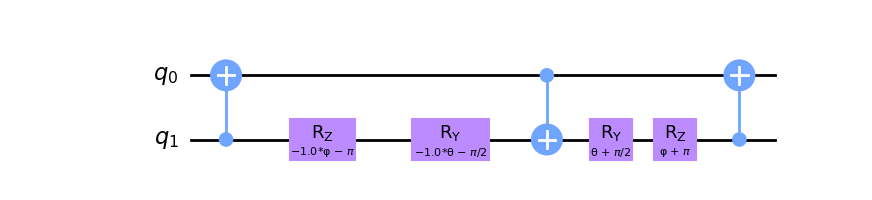

In [ ]:
circuit = LinearMappedUnboundParametricQuantumCircuit(2)

theta, phi = circuit.add_parameters("theta", "phi")

circuit.add_CNOT_gate(1, 0)
circuit.add_ParametricRZ_gate(1, {phi: -1, CONST: -pi})
circuit.add_ParametricRY_gate(1, {theta: -1, CONST: -pi / 2})
circuit.add_CNOT_gate(0, 1)
circuit.add_ParametricRY_gate(1, {theta: 1, CONST: pi / 2})
circuit.add_ParametricRZ_gate(1, {phi: 1, CONST: pi})
circuit.add_CNOT_gate(1, 0)

# QURI Partsには回路を図示するための関数、draw_circuitが用意されているので使って図示してみます。
from quri_parts.circuit.utils.circuit_drawer import draw_circuit

bound_circuit = circuit.bind_parameters([pi, pi])  # theta = pi, phi = piを入れてみます。
draw_circuit(bound_circuit)

   ___                                             ___  
  |CX |                                           |CX | 
--|0  |---------------------●---------------------|6  |-
  |___|                     |                     |___| 
    |      ___     ___     _|_     ___     ___      |   
    |     |RZ |   |RY |   |CX |   |RY |   |RZ |     |   
----●-----|1  |---|2  |---|3  |---|4  |---|5  |-----●---
          |___|   |___|   |___|   |___|   |___|         


# 第2章 演算子と期待値

量子力学では物理量はエルミート演算子$\hat{O}$で表され、オブザーバブル (観測量) と呼ばれます。ある状態 $|\psi\rangle$ について、$⟨ψ|\hat{O}|ψ⟩$ によって期待値が計算できます。

エルミート演算子はパウリ演算子の積の和で表現できるので、

$$\hat{O} = \sum_i{a_i \hat{P}_i}$$

量子計算では各パウリ演算子の積 $\hat{P}_i$ に対して測定を行い、係数 $a_i$ を掛けて足し合わせることで、目的の演算子の期待値を得ます。

$$\hat{O} = ⟨ψ|\hat{O}|ψ⟩ = \sum_i{a_i ⟨\psi|\hat{P}_i|\psi⟩}$$

この章ではQURI Partsを使って、演算子を表現し、期待値を推定する方法を紹介していきたいと思います。まずはパウリ演算子の積を指定するための、パウリラベルという表現を見ていきましょう。

## パウリラベル

パウリラベル (パウリ文字列) は、各量子ビットに作用する幾つかのパウリ行列の積を表現します。例えば、$X_0 Y_2 Z_4$は、量子ビット０に作用する$X$、量子ビット2に作用する$Y$、量子ビット4に作用する$Z$を意味しており、以下のように定義できます。

In [ ]:
from quri_parts.core.operator import pauli_label
label = pauli_label("X0 Y2 Z4")
# パウリ名と量子ビット番号の間にスペースを入れることもできます
label = pauli_label("X 0 Y 2 Z 4")
print(label)

X0 Y2 Z4


`PAULI_IDENTITY`は0個のパウリ行列の作用を表現するPauliラベルです。

In [ ]:
from quri_parts.core.operator import PAULI_IDENTITY
print(PAULI_IDENTITY)

I


パウリラベルは不変でハッシュ化可能なオブジェクトで、量子ビット番号と`SinglePauli`列挙型のペアからなり、イテレータで取り出すことができます。

In [ ]:
for pair in label:
    print(pair)

(0, <SinglePauli.X: 1>)
(4, <SinglePauli.Z: 3>)
(2, <SinglePauli.Y: 2>)


In [ ]:
for index, matrix in label:
    print(f"qubit index: {index}, Pauli matrix: {matrix}")

qubit index: 0, Pauli matrix: 1
qubit index: 4, Pauli matrix: 3
qubit index: 2, Pauli matrix: 2


`SinglePauli`は`IntEnum`なので、`SinglePauli.X`、`SinglePauli.Y`、`SinglePauli.Z`の代わりに、1、2、3を使うこともできます。

In [ ]:
from quri_parts.core.operator import SinglePauli
print(SinglePauli.X == 1)
print(SinglePauli.Y == 2)
print(SinglePauli.Z == 3)

True
True
True


## 演算子

演算子はパウリラベルとその係数で定義されます。例えば、$(0.5 + 0.5i) X_0 Y_1 + 0.2i Z_0 Z_2 + 0.3 + 0.4i$は、以下のように定義されます。

In [ ]:
from quri_parts.core.operator import Operator
op = Operator({
    pauli_label("X0 Y1"): 0.5 + 0.5j,
    pauli_label("Z0 Z2"): 0.2j,
    PAULI_IDENTITY: 0.3 + 0.4j,
})
print(op)

(0.5+0.5j)*X0 Y1 + 0.2j*Z0 Z2 + (0.3+0.4j)*I


オペレータは、順番にパウリ項を追加することで作成することもできます。

In [ ]:
op = Operator()
op.add_term(pauli_label("X0 Y1"), 0.5 + 0.5j)
op.add_term(pauli_label("Z0 Z2"), 0.2j)
op.constant = 0.3 + 0.4j
print(op)
print(f"Number of terms: {op.n_terms}")

# 既存の項に追加した場合、係数は加算されます
op.add_term(pauli_label("X0 Y1"), 0.5)
print(op)
print(f"Number of terms: {op.n_terms}")

# 係数が0になった場合、項は削除されます
op.add_term(pauli_label("X0 Y1"), -1.0 - 0.5j)
print(op)
print(f"Number of terms: {op.n_terms}")

(0.5+0.5j)*X0 Y1 + 0.2j*Z0 Z2 + (0.3+0.4j)*I
Number of terms: 3
(1+0.5j)*X0 Y1 + 0.2j*Z0 Z2 + (0.3+0.4j)*I
Number of terms: 3
0.2j*Z0 Z2 + (0.3+0.4j)*I
Number of terms: 2


内部的には`Operator`は`dict`なので、辞書として操作することもできます。

In [ ]:
p = pauli_label("Z0 Z2")
coef = op[p]
print(f"Coefficient of {p} = {coef}")

op[p] = 0.4
coef = op[p]
print(f"Coefficient of {p} = {coef}")

for label, coef in op.items():
    print(f"Coefficient of {label} = {coef}")

Coefficient of Z0 Z2 = 0.2j
Coefficient of Z0 Z2 = 0.4
Coefficient of Z0 Z2 = 0.4
Coefficient of I = (0.3+0.4j)


以下にオペレータ関連の便利な機能をまとめます。

In [ ]:
from quri_parts.core.operator import commutator, get_sparse_matrix, is_hermitian
op1 =  Operator({pauli_label("X0 Z1"): 8j})
op2 =  Operator({pauli_label("Y1"): -4})

print("op1 = ", op1)
print("op2 = ", op2)

# 和
print("")
print("op1 + op2", "=", op1 + op2)

# 差
print("op1 - op2", "=", op1 - op2)

# スカラー倍
print("op1 * 3j", "=", op1 * 3j)
print("op1 / 2j", "=", op1 / 2j)

# 積
print("op1 * op2", "=", op1 * op2)
print("op2 * op1", "=", op2 * op1)

# エルミート共役
print("")
print("op1^†", "=", op1.hermitian_conjugated())
print("op2^†", "=", op2.hermitian_conjugated())

# 交換子
print("")
print("[op1, op2]", "=", commutator(op1, op2))

# エルミート演算子かどうかのチェック
print("")
print("op1 == op1^†?", is_hermitian(op1))

# 疎行列の取得
print("")
print("op2:")
print(get_sparse_matrix(op2))

op1 =  8j*X0 Z1
op2 =  -4*Y1

op1 + op2 = 8j*X0 Z1 + -4*Y1
op1 - op2 = 8j*X0 Z1 + 4*Y1
op1 * 3j = (-24+0j)*X0 Z1
op1 / 2j = (4+0j)*X0 Z1
op1 * op2 = (-32+0j)*X0 X1
op2 * op1 = (32+0j)*X0 X1

op1^† = -8j*X0 Z1
op2^† = -4*Y1

[op1, op2] = (-64+0j)*X0 X1

op1 == op1^†? False

op2:
  (2, 0)	(-0-4j)
  (3, 1)	(-0-4j)
  (0, 2)	4j
  (1, 3)	4j


## 量子状態

QURI Partsでは幾つかの種類の量子状態準備が可能です。まずは、最も基本的な計算基底について紹介しましょう。

計算基底状態は、各量子ビットが0または1の固有状態であるような量子状態です。5量子ビットの計算基底状態を作ってみましょう。

In [ ]:
from quri_parts.core.state import quantum_state

state1 = quantum_state(5, bits=0b10100)
print(state1)

ComputationalBasisState(qubit_count=5, bits=0b10100, phase=0π/2)


ここでは`bits=0b10100`は、量子ビット0が$|0\rangle$、量子ビット1が$|0\rangle$、量子ビット2が$|1\rangle$、量子ビット3が$|0\rangle$、量子ビット4が$|1\rangle$の状態を意味します。インデックスは0始まりで、下位ビット側から上位ビット側の順で割り振られています。

また、2つの状態の重ね合わせを作成することもできます。結果として得られる状態は、計算基底状態ではなくなることに注意してください。`comp_basis_superposition()`メソッドは4つの引数を取ります。最初の2つは重ね合わされる状態です。3つ目の引数$\theta$は重ね合わせの重みで、4つ目の引数$\phi$は重ね合わせの位相因子を意味します。2つの計算基底状態$\left|s_0\right\rangle$と$\left|s_1\right\rangle$の重ね合わせを式で表すと以下のようになります。

$$
\left|\psi\right\rangle = \cos\theta\left|s_0\right\rangle + \sin\theta\exp(i\phi)\left|s_1\right\rangle
$$

In [ ]:
import math
from quri_parts.core.state import comp_basis_superposition

state2 = quantum_state(5, bits=0b01011)
sp_state = comp_basis_superposition(state1, state2, math.pi/2, math.pi/4)
print(sp_state)

GeneralCircuitQuantumState(n_qubits=5, circuit=<quri_parts.circuit.circuit.ImmutableQuantumCircuit object at 0x7f7da8543160>)


## Estimator

あたえられた状態に対して演算子の期待値を計算するには、`QuantumEstimator`を使います。`QuantumEstimator` (`quri_parts.core.estimator`パッケージにあります。) 自体は抽象的なインタフェースなので、使用する際は適宜、具体的なインスタンスが必要です。`QuantumEstimator`のインタフェースは、状態ベクトルのシミュレーション、サンプリングのシミュレーション、実デバイスでのサンプリングなど様々な方法での期待値推定に共通して使用できます。

In [ ]:
from quri_parts.qulacs.estimator import create_qulacs_vector_estimator
# Estimatorを作成し
estimator = create_qulacs_vector_estimator()
# 演算子と状態を渡します
estimate = estimator(op, sp_state)
# 戻り値には推定された期待値と、誤差が含まれています
print(f"Estimated expectation value: {estimate.value}")
# (状態ベクトルのシミュレーションを行なった場合、誤差は0になります)
print(f"Estimation error: {estimate.error}")

Estimated expectation value: (-0.10000000000000003+0.4j)
Estimation error: 0.0


`QuantumEstimator`の戻り値には、期待値 (`.value`) と誤差 (`.error`) が含まれています。

### さまざまなEstimator

QURI Partsには通常のestimatorに加えて、以下のような種類のestimatorも用意されています。
- `ParametricQuantumEstimator`
- `ConcurrentQuantumEstimator`
- `ConcurrentParametricQuantumEstimator`

`ParametricQuantumEstimator`では、パラメトリック回路とパラメータから直接期待値を計算できます。これを使うことで

- 状態がパラメータに依存していることが明確になり、パラメータ付きの状態に対する問題を扱えるようになる (例えば、パラメータに対する期待値の勾配)
- Qulacs等のシミュレータでの処理性能の向上

が期待できます。

`ConcurrentQuantumEstimator`では以下のように、複数の演算子や複数の状態を1度に計算できます。

- 1つの演算子、複数の状態
- 複数の演算子、1つの状態
- 同じ数の、複数の演算子と複数の状態

( 例えばQulacsを使用する場合は、`concurrent.futures.Executor` (デフォルトでは`None`で、並列化を行わない。) と並列数 (デフォルトでは1) を指定して、`ConcurrentQuantumEstimator`を作成します。Qulacsはそれ自体が並列処理をサポートしているため、`ThreadPoolExecutor`や`ProcessPoolExecutor`の使用では、パフォーマンスが改善されないかもしれません。)


`ConcurrentParametricQuantumEstimator`は`ParametricQuantumEstimator`のconcurrent版です。

状況によってそれぞれのestimatorを使い分けるのは、実装する上でコードが複雑になる場合があります。そこでQURI Partsでは入力によって自動的に適切なestimatorを選んで実行してくれる関数`create_general_estimator_from_estimator`を用意しています。

In [ ]:
from quri_parts.qulacs.estimator import create_qulacs_vector_estimator
from quri_parts.core.estimator import create_general_estimator_from_estimator
from quri_parts.core.state import ParametricCircuitQuantumState

# まずEstimatorを作成し
estimator = create_qulacs_vector_estimator()
# create_general_estimator_from_estimatorに入力することでgeneral enstimatorを作ります。
general_estimator = create_general_estimator_from_estimator(estimator)

# このgeneral_estimatorは入力する演算子、状態に応じて中で適切なestimatorを使ってくれます。

# estimator
est_1 = general_estimator(op, state1)
print(f"value={est_1.value}, error={est_1.error}")

# concurrent estimator
est_2 = general_estimator(op, [state1, state2])
for est in est_2:
    print(f"value={est.value}, error={est.error}")

# parametric estimator
# まずparametric stateを準備します。
parametric_state = ParametricCircuitQuantumState(3, parametric_circuit)

est_3 = general_estimator(op, parametric_state, [0.2, 0.3])
print(f"value={est_3.value}, error={est_3.error}")

# cincurrent parametric estimator
est_4 = general_estimator(op, parametric_state, [[0.2, 0.3], [0.4, 0.5]])
for est in est_4:
    print(f"value={est.value}, error={est.error}")

value=(-0.10000000000000003+0.4j), error=0.0
value=(-0.10000000000000003+0.4j), error=0.0
value=(-0.10000000000000003+0.4j), error=0.0
value=(0.29999999999999993+0.39999999999999997j), error=0.0
value=(0.29999999999999993+0.39999999999999997j), error=0.0
value=(0.3+0.4j), error=0.0


## Exercise 2

$-(X_0 X_1 + Y_0 Y_1 + Z_0 Z_1)$という演算子を定義し、$|11⟩$という状態に対して期待値推定を行ってみてください。`Estimator`は`create_qulacs_vector_estimator()`で作成してください。

In [ ]:
J = -1
op = Operator({
    pauli_label("X0 X1"): J,
    pauli_label("Y0 Y1"): J,
    pauli_label("Z0 Z1"): J,
})

state = quantum_state(2, bits=0b11)
estimator = create_qulacs_vector_estimator()
estimate = estimator(op, state)
print(estimate.value)

(-1+0j)


## Sampling シミュレーション

シミュレータでは状態ベクトルや密度行列を直接扱うことができるので、演算子の期待値もそのまま計算できます。しかし実機を使用する場合には、複数回の測定を繰り返すことで、状態ベクトルや演算子の期待値を推定しなければなりません。(シミュレータでも状態ベクトルに従って、多項分布乱数を使用して、確率的にサンプリングを再現することもできます。)

サンプリング測定では、量子回路の実行と量子ビットの測定が複数回繰り返され、複数回の測定結果の統計値から、演算子の期待値が推定されます。

### 回路の準備

まずはサンプリングを行うための回路を作成しましょう。

In [ ]:
from math import pi
from quri_parts.circuit import QuantumCircuit
# 4量子ビットの回路
circuit = QuantumCircuit(4)
circuit.add_X_gate(0)
circuit.add_H_gate(1)
circuit.add_Y_gate(2)
circuit.add_CNOT_gate(1, 2)
circuit.add_RX_gate(3, pi/4)

## Sampler

サンプリング測定には、`Sampler`を使用します。`Sampler` (quri_parts.core.samplingで定義されています。) 自体は抽象的なインタフェースなので、実際にサンプリングを行うには、適宜、具体的なインスタンスが必要です。`Sampler`にはシミュレータを使用するものや、実機を使用するものなど幾つかの実装があります。

ここでは、Qulacsの状態ベクトルシミュレーションを利用したSamplerを使ってみましょう。

In [ ]:
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler
# Samplerを作成
sampler = create_qulacs_vector_sampler()
sampling_result = sampler(circuit, shots=1000)
print(sampling_result)

Counter({3: 447, 5: 411, 11: 73, 13: 69})


Samplerはサンプリング対象の回路と、サンプリング回数 (shots) の2つの引数を取ります。戻り値は以下のようなKeyとValueからなる辞書になっています。

- **Keys** 測定結果を表現するint型のビット列。各量子ビットの測定結果は下位ビット側から上位ビット側の順に並んでいる。例えば量子ビット0と量子ビット2が$|1\rangle$で、それ以外が$|0\rangle$の場合、ビット列は`0b0101`となる。
- **Values** 各ビット列が測定された回数。すべての回数を足し合わせると`shots`に等しくなる。

In [ ]:
for bits, count in sampling_result.items():
    print(f"A bitstring '{bin(bits)}' is measured {count} times")
print(f"Total count is {sum(sampling_result.values())}")

A bitstring '0b11' is measured 447 times
A bitstring '0b101' is measured 411 times
A bitstring '0b1011' is measured 73 times
A bitstring '0b1101' is measured 69 times
Total count is 1000


上の例では、量子ビット0は$X$ゲートのみが作用しており、常に$|1\rangle$として測定されています。一方で、量子ビット1、2、3は0または1になりますが、量子ビット1と2はCNOTゲートによってもつれた状態にあるため、測定結果のパターンは4通りになっています。

## サンプリング推定
ある演算子の期待値を計算する際にestimatorを用いましたが、実際の量子コンピュータではサンプリングしかできないので、サンプリング結果から期待値を推定する必要があります。
ここではサンプリングから期待値を推定してみましょう。

まずは推定される演算子を定義してみましょう。

In [ ]:
from quri_parts.core.operator import Operator, pauli_label, PAULI_IDENTITY
op = Operator({
    pauli_label("Z0"): 0.25,
    pauli_label("Z1 Z2"): 2.0,
    pauli_label("X1 X2"): 0.5 + 0.25j,
    pauli_label("Z1 Y3"): 1.0j,
    pauli_label("Z2 Y3"): 1.5 + 0.5j,
    pauli_label("X1 Y3"): 2.0j,
    PAULI_IDENTITY: 3.0,
})
print(op)

0.25*Z0 + 2.0*Z1 Z2 + (0.5+0.25j)*X1 X2 + 1j*Z1 Y3 + (1.5+0.5j)*Z2 Y3 + 2j*X1 Y3 + 3.0*I


演算子はパウリ演算子の和として表現されます。そうした演算子の期待値を推定する1つの方法は、それぞれのパウリ項の期待値を推定し足し上げることです。

パウリ項が交換可能な場合、複数のパウリ項を1度に測定することができます。そのためにまずはパウリ項を交換可能なパウリ項ごとにグループ化します。このようなパウリグルーピングは、演算子の推定において1つの重要な研究分野になっています。

最もシンプルな方法の1つはビットごとの交換可能性に基づいたグループ化 (*bitwise grouping*) です。これは以下のように実行できます。

In [ ]:
from quri_parts.core.operator.grouping import bitwise_pauli_grouping

pauli_sets = bitwise_pauli_grouping(op)
print(pauli_sets)

frozenset({frozenset({PauliLabel({(1, <SinglePauli.X: 1>), (3, <SinglePauli.Y: 2>)})}), frozenset({PauliLabel()}), frozenset({PauliLabel({(1, <SinglePauli.X: 1>), (2, <SinglePauli.X: 1>)})}), frozenset({PauliLabel({(0, <SinglePauli.Z: 3>)}), PauliLabel({(2, <SinglePauli.Z: 3>), (1, <SinglePauli.Z: 3>)})}), frozenset({PauliLabel({(2, <SinglePauli.Z: 3>), (3, <SinglePauli.Y: 2>)}), PauliLabel({(3, <SinglePauli.Y: 2>), (1, <SinglePauli.Z: 3>)})})})


グループ化関数はパウリラベルのfrozensetのfrozensetを返すため、やや複雑な見た目になっています。

In [ ]:
print(f"Number of groups: {len(pauli_sets)}")
for i, pauli_set in enumerate(pauli_sets):
    labels = ", ".join([str(pauli) for pauli in pauli_set])
    print(f"Group {i} contains: {labels}")

Number of groups: 5
Group 0 contains: X1 Y3
Group 1 contains: I
Group 2 contains: X1 X2
Group 3 contains: Z0, Z1 Z2
Group 4 contains: Z2 Y3, Z1 Y3


### 測定回路

交換可能なパウリセットを測定するには、測定の前に適用される回路を作成する必要があります。bitwise groupingを使用する場合、以下のように回路を構築できます。

In [ ]:
from quri_parts.circuit.utils.circuit_drawer import draw_circuit
from quri_parts.core.measurement import bitwise_commuting_pauli_measurement_circuit

pauli_set = {pauli_label("Z2 Y3"), pauli_label("Z1 Y3")}
measurement_circuit = bitwise_commuting_pauli_measurement_circuit(pauli_set)
draw_circuit(QuantumCircuit(qubit_count=4, gates=measurement_circuit))

                
                
----------------
                
                
                
----------------
                
                
                
----------------
                
   ___     ___  
  |Sdg|   | H | 
--|0  |---|1  |-
  |___|   |___| 


### サンプリング

それでは以下のような手順でサンプリングを行います。

- 期待値を測定したい回路（状態回路）を作成する
- パウリセットの測定のための回路を、状態準備の回路の後ろに連結する
- 連結された回路に対してサンプリングを行う


ここでは簡単のために初期状態として`ComputationalBasisState`を準備していますが、任意の`CircuitQuantumState`を使用することができます。

In [ ]:
from quri_parts.core.state import quantum_state

initial_state = quantum_state(4, bits=0b0101)
# 状態準備のための回路
state_prep_circuit = initial_state.circuit
# 測定回路を連結します
sampled_circuit = state_prep_circuit + measurement_circuit
# サンプリングを行います
sampling_result = sampler(sampled_circuit, shots=1000)
print({bin(bits): count for bits, count in sampling_result.items()})

{'0b1101': 531, '0b101': 469}


### サンプリング結果からのパウリ項の再構築

パウリ項の値はサンプリング結果から再構築する必要があります。上の例では$Z_2 Y_3$と$Z_1 Y_3$がサンプリング測定され、`0b1101`と`0b0101`の2つのビットパターンが得られました。bitwise groupingの場合、パウリ演算子の値は以下のように再構築できます。

In [ ]:
from quri_parts.core.measurement import bitwise_pauli_reconstructor_factory
# Z2 Y3のためのreconstructorを作成します
reconstructor = bitwise_pauli_reconstructor_factory(pauli_label("Z2 Y3"))
# サンプル結果のビットパターン0b1101からZ2 Y3の値を再構築します
pauli_value = reconstructor(0b1101)
print(pauli_value)
# 0b0101から再構築します
pauli_value = reconstructor(0b0101)
print(pauli_value)

1
-1


$Z_2 Y_3$の期待値は以下のように計算できます。

In [ ]:
pauli_exp = (
    reconstructor(0b1101) * sampling_result[0b1101] +
    reconstructor(0b0101) * sampling_result[0b0101]
) / 1000
print(pauli_exp)

# 上の例と等価です
pauli_exp = sum(
    reconstructor(bits) * count for bits, count in sampling_result.items()
) / sum(sampling_result.values())
print(pauli_exp)

# より便利な方法もあります
from quri_parts.core.estimator.sampling import trivial_pauli_expectation_estimator
pauli_exp = trivial_pauli_expectation_estimator(sampling_result, pauli_label("Z2 Y3"))
print(pauli_exp)

0.062
0.062
0.062


ここではbitwise groupingを使用しているため、`trivial_pauli_expectation_estimator`を使用しています。より一般的な場合には、`general_pauli_expectation_estimator`を`PauliReconstuctorFactory`とともに使用してください。

In [ ]:
from quri_parts.core.estimator.sampling import general_pauli_expectation_estimator
pauli_exp = general_pauli_expectation_estimator(
    sampling_result, pauli_label("Z2 Y3"), bitwise_pauli_reconstructor_factory
)
print(pauli_exp)

0.062


### オリジナルの演算子の期待値を、パウリ項の推定値から推定する

最後に、各パウリ項を足し合わせることで、オリジナルの演算子の期待値を推定します。$Z_2 Y_3$の寄与は以下のように計算できます。

In [ ]:
# opに含まれるZ2 Y3の係数を取得します
coef = op[pauli_label("Z2 Y3")]
pauli_contrib = coef * pauli_exp
print(pauli_contrib)

(0.093+0.031j)


各パウリ項についてこの手順を繰り返すことで、オリジナルの演算子の期待値が推定できます。

### サンプリング推定のショートカットメソッド

上の手順は少し複雑なので、ショートカットできるメソッドが用意されています。まずは`CommutablePauliSetMeasurement`オブジェクトについて紹介します。これは今まで扱ってきた以下の要素を全て持っている便利なオブジェクトです。

- `pauli_set`: 一緒に測定される、交換可能なパウリ演算子のセット
- `measurement_circuit`: あたえられた`pauli_set`を測定するための回路
- `pauli_reconstructor_factory`: サンプリング結果からパウリ演算子の値を再構築するためのファクトリ関数

`CommutablePauliSetMeasurement`を構築するには、特定の測定スキームを選択する必要があります。例えば、bitwise groupingを使用する場合は以下のようにします。

In [ ]:
from quri_parts.core.measurement import bitwise_commuting_pauli_measurement
measurements = bitwise_commuting_pauli_measurement(op)
print(f"Number of CommutablePauliSetMeasurement: {len(measurements)}")
measurement = measurements[0]
print(measurement.pauli_set)
print(measurement.measurement_circuit)
print(measurement.pauli_reconstructor_factory)

Number of CommutablePauliSetMeasurement: 5
frozenset({PauliLabel({(1, <SinglePauli.X: 1>), (3, <SinglePauli.Y: 2>)})})
(QuantumGate(name='H', target_indices=(1,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='Sdag', target_indices=(3,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()), QuantumGate(name='H', target_indices=(3,), control_indices=(), classical_indices=(), params=(), pauli_ids=(), unitary_matrix=()))
<function bitwise_pauli_reconstructor_factory at 0x7f7da85c2f80>


推定のために必要なもう1つの入力は`PauliSamplingShotsAllocator`です。このオブジェクトはサンプリングの全体のショット数が各パウリセットに対してどのように割り振られるかを指定します。幾つかのアロケータが用意されています。

In [ ]:
from quri_parts.core.sampling.shots_allocator import (
    create_equipartition_shots_allocator,
    create_proportional_shots_allocator,
    create_weighted_random_shots_allocator,
)
# ショット数をパウリセットに均等に分配する
allocator = create_equipartition_shots_allocator()
# ショット数を演算子のパウリ係数に比例するように割り当てる
allocator = create_proportional_shots_allocator()
# ショット数をパウリ係数に応じた重みからランダムに分配する
allocator = create_weighted_random_shots_allocator(seed=777)

これらの入力値を使用して、以下のようにサンプリング推定を行うことができます。

In [ ]:
from quri_parts.qulacs.sampler import create_qulacs_vector_concurrent_sampler
from quri_parts.core.estimator.sampling import sampling_estimate
concurrent_sampler = create_qulacs_vector_concurrent_sampler()
estimate = sampling_estimate(
    op,            # 期待値を推定する演算子
    initial_state, # 初期 (回路) 状態
    5000,          # 合計サンプリングショット数
    concurrent_sampler, # ConcurrentSampler
    bitwise_commuting_pauli_measurement, # CommutablePauliSetMeasurementのファクトリ関数
    allocator,     # PauliSamplingShotsAllocator
)
print(f"Estimated expectation value: {estimate.value}")
print(f"Standard error of estimation: {estimate.error}")

Estimated expectation value: (0.7945570979868829+0.014862561120120242j)
Standard error of estimation: 0.07111821936049047


また、`create_sampling_estimator`という関数を用いることで、サンプリングで期待値を推定する`QuantumEstimator`を構成することができます。

In [ ]:
from quri_parts.core.estimator.sampling import create_sampling_estimator
estimator = create_sampling_estimator(
    5000,          # 合計サンプリングショット数
    concurrent_sampler, # ConcurrentSampler
    bitwise_commuting_pauli_measurement, # CommutablePauliSetMeasurementのファクトリ関数
    allocator,     # PauliSamplingShotsAllocator
)
estimate = estimator(op, initial_state)
print(f"Estimated expectation value: {estimate.value}")
print(f"Standard error of estimation: {estimate.error}")

Estimated expectation value: (0.6821789321789321+0.04427724095227232j)
Standard error of estimation: 0.07082977606463033


# 第3章 変分アルゴリズム


パラメータを持つ量子回路に対してパラメータの最適値を探索する、変分量子アルゴリズムと呼ばれる一群のアルゴリズムが存在します。この章ではまず演算子の期待値の勾配を計算し、続いてこの勾配を用いて変分量子固有値ソルバ (VQE) と呼ばれるアルゴリズムを構成する方法を説明したいと思います。

## 演算子の期待値の勾配

変分アルゴリズムではしばしば特定のコスト関数の最小化が目的とされますが、こうしたコスト関数は特定のパラメータ付き量子回路の演算子の期待値として定義されます。
$f(\theta) = \langle O \rangle_\theta = \langle \psi(\theta)|O|\psi(\theta) \rangle$ ただし $O$ は演算子、$\psi(\theta)$ は $\theta = \theta_0,\dots,\theta_{m - 1}$ によるパラメータ状態です。こうした最小化では、以下のようなコスト関数の勾配がしばしば用いられます。

$$
\nabla_\theta f(\theta) = \left(\frac{\partial \langle O \rangle_\theta}{\partial \theta_0}, \dots, \frac{\partial \langle O \rangle_\theta}{\partial \theta_{m - 1}} \right)
$$

以下ではこうした勾配を計算するための、数値勾配とパラメータシフトルールという2つの方法を見ていきましょう。

まずは対象の演算子とパラメータ状態を準備します。

In [ ]:
from quri_parts.core.operator import Operator, pauli_label

op = Operator({
    pauli_label("X0 Y1"): 0.5 + 0.5j,
    pauli_label("Z0 X1"): 0.2,
})

from math import pi
from quri_parts.circuit import LinearMappedUnboundParametricQuantumCircuit, CONST

param_circuit = LinearMappedUnboundParametricQuantumCircuit(2)
param_circuit.add_H_gate(0)
param_circuit.add_CNOT_gate(0, 1)

theta, phi = param_circuit.add_parameters("theta", "phi")
param_circuit.add_ParametricRX_gate(0, {theta: 1/2, phi: 1/3, CONST: pi/2})
param_circuit.add_ParametricRZ_gate(1, {theta: 1/3, phi: -1/2, CONST: -pi/2})

from quri_parts.core.state import ParametricCircuitQuantumState

param_state = ParametricCircuitQuantumState(2, param_circuit)

### 数値勾配

QURI Partsでは勾配推定のために`quri_parts.core.estimator.GradientEstimator`インタフェースが用意されています。数値微分を使用したシンプルな勾配推定は以下のように行います。

In [ ]:
from quri_parts.core.estimator.gradient import create_numerical_gradient_estimator
from quri_parts.qulacs.estimator import create_qulacs_vector_concurrent_parametric_estimator

qulacs_concurrent_parametric_estimator = create_qulacs_vector_concurrent_parametric_estimator()
gradient_estimator = create_numerical_gradient_estimator(
    qulacs_concurrent_parametric_estimator,
    delta=1e-4,
)

gradient = gradient_estimator(op, param_state, [0.2, 0.3])
print("Estimated gradient:", gradient.values)

Estimated gradient: [(0.0004866565750383245-0.013872819366045341j), (0.042165661391369014+0.020809229047680233j)]


勾配推定器の作成時には2つの引数をあたえます。1つ目は`ConcurrentParametricQuantumEstimator`でわずかにシフトした変数に対する期待値推定を行うために使用されます。2つ目は`delta`で数値微分の刻み幅を指定します。勾配推定器は演算子、パラメータ状態、勾配を評価するパラメータ値を用いて実行され、勾配の推定値を返します。


### パラメータシフトルールを用いた勾配評価 (Skip)

パラメータシフトルールは、パラメータ回路によって生成された状態に対する演算子の期待値の勾配を評価する方法です[1]。 QURI Partsではパラメータシフトルールによって勾配を推定する方法も提供しています。ここではパラメータ回路に含まれるパラメトリックゲートはすべて $\exp{(-i\theta P/2)}$ ただし $P$ はパウリ積という状態を仮定しています。QURI Partsによって定義されるパラメトリックゲートはすべてこの条件を満たしています。

[1]: Mitarai, K. and Negoro, M. and Kitagawa, M. and Fujii, K., [Phys. Rev. A **98**, 032309 (2018)](https://doi.org/10.1103/PhysRevA.98.032309). [arXiv:1803.00745](https://arxiv.org/abs/1803.00745).



これは、以下のような関数で計算できます。

In [ ]:
from quri_parts.core.estimator.gradient import create_parameter_shift_gradient_estimator
from quri_parts.qulacs.estimator import create_qulacs_vector_concurrent_parametric_estimator

qulacs_concurrent_parametric_estimator = create_qulacs_vector_concurrent_parametric_estimator()

gradient_estimator = create_parameter_shift_gradient_estimator(
    qulacs_concurrent_parametric_estimator,
)

gradient = gradient_estimator(op, param_state, [0.2, 0.3])
print("Estimated gradient:", gradient.values)

Estimated gradient: [(0.00048665657669647033-0.013872819366718317j), (0.04216566140053679+0.020809229050077496j)]


## 変分量子固有値ソルバ (VQE)

変分量子固有値ソルバ (VQE) はパラメータを持つ量子状態に対して、演算子の期待値 (例えば分子のエネルギーなど) を最適化する手法です。

分子や物質の性質の一部は、以下のようなシュレディンガー方程式を解くことで、明らかにできます。

$$H|\psi⟩ = E|\psi⟩$$

ここで、Hはハミルトニアンと呼ばれる演算子 (行列) で、分子の形など、系によって決まっています。シュレディンガー方程式を解くことは、ハミルトニアンHの固有値問題を解き、固有値$E_i$と対応する固有ベクトル (固有状態) $|ϕ_i⟩$を求めることと同値です。この時固有値$E_i$は固有状態$|\phi_i⟩$のエネルギーとなります。

特殊な状況を除いて、電子の状態は基底状態にあることがほとんどなので、固有状態の中でも特に基底状態に興味を持たれることが多いです。変分法では、任意の状態$|ψ⟩$について、そのエネルギー期待値が基底エネルギー$E_0$以上となることを利用します。

$$⟨ψ|H|ψ⟩ ≥ E_0$$

仮にランダムに状態$\{|\psi_i⟩\}$を用意し、その中で一番エネルギーが低い状態を見つければ、それは$\{|\psi_i⟩\}$の中では、最も基底状態に近い状態になるでしょう。実際には、ランダムに状態を取ってくるのは効率がわるいので、経験的にパラメータ付きの量子状態$|\psi(\theta)⟩$を用意し、エネルギー期待値を最小化するような$θ$を見つけるという方法がとられています。

VQEは、変分法において、量子計算機で効率的に記述できる量子状態を用いて基底状態を探索するアルゴリズムです。VQEの実行手順は以下の通りです。

1. 量子計算機上で量子状態$|\psi(\theta)⟩$を生成する
2. $⟨H(\theta)⟩ = ⟨\phi(\theta)|H|\psi(\theta)⟩$を測定する
3. 測定結果をもとに、古典計算機で$⟨\psi(\theta)|H|\psi(\theta)⟩$が小さくなるような$\theta$を求める

この手順を$⟨\psi(\theta)|H|\psi(\theta)⟩$が収束するまで繰り返すことで、近似的な基底状態を求めます。

VQEには大きく2つの部品があります。

- *Ansatz*: パラメータ化された量子状態を生成するための、パラメータ付きの量子回路
- *Optimizer*: 数値的に演算子の期待値を最適化する方法

### Ansatz

VQEの文脈では、ansatzは対象の演算子の期待値を評価するための、パラメータ化された量子状態を生成するための、パラメータ化された量子回路を指します。`(LinearMapped)UnboundParametricQuantumCircuit`を直接定義することもできますし、`quri_parts.algo.ansatz`パッケージに含まれる、よく使われるansatzを使用することもできます。ここでは、例としてhardware-efficient ansatz [1] を使用しています。

[1]: Kandala, A., Mezzacapo, A., Temme, K. et al. Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets. [Nature **549**, 242–246 (2017)](https://doi.org/10.1038/nature23879).

In [ ]:
from quri_parts.algo.ansatz import HardwareEfficient

hw_ansatz = HardwareEfficient(qubit_count=4, reps=3)

期待値を評価するためにはパラメータ化された量子状態が必要ですが、これは初期状態にansatzを適用することで得られます。ここでは計算基底状態 $|0011\rangle$を使ってみましょう。

In [ ]:
from quri_parts.core.state import ParametricCircuitQuantumState, quantum_state

# 現状ではパラメータ化された量子状態の準備はすこし複雑になっています
def prepare_parametric_state(initial_state, ansatz):
    circuit = LinearMappedUnboundParametricQuantumCircuit(initial_state.qubit_count)
    circuit += initial_state.circuit
    circuit += ansatz
    return ParametricCircuitQuantumState(initial_state.qubit_count, circuit)

cb_state = quantum_state(4, bits=0b0011)
parametric_state = prepare_parametric_state(cb_state, hw_ansatz)

### Optimizer

オプティマイザはコスト関数を最小化するような最適なパラメータを探索します。VQEの文脈ではコスト関数は対象の演算子の期待値が使用されます。オプティマイザの種類によって、コスト関数それ自体のみが使用されたり、コスト関数の勾配が使用されたりします。`scipy.optimize`ライブラリや`quri_parts.algo.optimizer`パッケージのオプティマイザを自由に使用することができます。この例ではAdam [1] を使用しています。

[1]: Diederik P. Kingma, Jimmy Ba, Adam: A Method for Stochastic Optimization. [arXiv:1412.6980 (2014)](https://doi.org/10.48550/arXiv.1412.6980)

In [ ]:
from quri_parts.algo.optimizer import Adam

# 引数で設定を調整することができます。詳細はリファレンスをご参照ください。
adam_optimizer = Adam()

### VQEを実行する

まずは対象の演算子を定義します。この演算子の期待値が最適化の対象になります。

In [ ]:
from quri_parts.core.operator import Operator, pauli_label, PAULI_IDENTITY

# Jordan-Wigner変換した水素分子のハミルトニアンを例として使用します
hamiltonian = Operator({
    PAULI_IDENTITY: 0.03775110394645542,
    pauli_label("Z0"): 0.18601648886230593,
    pauli_label("Z1"): 0.18601648886230593,
    pauli_label("Z2"): -0.2694169314163197,
    pauli_label("Z3"): -0.2694169314163197,
    pauli_label("Z0 Z1"): 0.172976101307451,
    pauli_label("Z0 Z2"): 0.12584136558006326,
    pauli_label("Z0 Z3"): 0.16992097848261506,
    pauli_label("Z1 Z2"): 0.16992097848261506,
    pauli_label("Z1 Z3"): 0.12584136558006326,
    pauli_label("Z2 Z3"): 0.17866777775953396,
    pauli_label("X0 X1 Y2 Y3"): -0.044079612902551774,
    pauli_label("X0 Y1 Y2 X3"): 0.044079612902551774,
    pauli_label("Y0 X1 X2 Y3"): 0.044079612902551774,
    pauli_label("Y0 Y1 X2 X3"): -0.044079612902551774,
})

この演算子とパラメータ化された状態を使用して、回路パラメータの関数としてコスト関数を定義できます。

In [ ]:
from quri_parts.qulacs.estimator import create_qulacs_vector_parametric_estimator

estimator = create_qulacs_vector_parametric_estimator()

def cost_fn(param_values):
    estimate = estimator(hamiltonian, parametric_state, param_values)
    return estimate.value.real

また数値勾配を使用して、コスト関数の勾配を定義します。

In [ ]:
import numpy as np
from quri_parts.core.estimator.gradient import create_numerical_gradient_estimator
from quri_parts.qulacs.estimator import create_qulacs_vector_concurrent_parametric_estimator

qulacs_concurrent_parametric_estimator = create_qulacs_vector_concurrent_parametric_estimator()
gradient_estimator = create_numerical_gradient_estimator(
    qulacs_concurrent_parametric_estimator,
    delta=1e-4,
)

def grad_fn(param_values):
    estimate = gradient_estimator(hamiltonian, parametric_state, param_values)
    return np.asarray([g.real for g in estimate.values])

それでは、QURI Partsのオプティマイザを使用してVEQを実行してみましょう。

In [ ]:
from quri_parts.algo.optimizer import OptimizerStatus

def vqe(operator, init_params, cost_fn, grad_fn, optimizer):
    opt_state = optimizer.get_init_state(init_params)
    while True:
        opt_state = optimizer.step(opt_state, cost_fn, grad_fn)
        if opt_state.status == OptimizerStatus.FAILED:
            print("Optimizer failed")
            break
        if opt_state.status == OptimizerStatus.CONVERGED:
            print("Optimizer converged")
            break
    return opt_state

init_params = [0.1] * hw_ansatz.parameter_count
result = vqe(hamiltonian, init_params, cost_fn, grad_fn, adam_optimizer)
print("Optimized value:", result.cost)
print("Optimized parameter:", result.params)
print("Iterations:", result.niter)
print("Cost function calls:", result.funcalls)
print("Gradient function calls:", result.gradcalls)

Optimizer converged
Optimized value: -1.111981340572802
Optimized parameter: [ 5.47178291e-02  8.40762264e-02  5.12253346e-02  8.19750385e-02
 -9.72099462e-03 -1.16141820e-01 -3.06727507e-03  9.66792838e-01
  1.27323903e-01  1.04790856e-01  1.27097745e-01  9.40512802e-02
 -1.60419276e-02  9.92326531e-01 -3.35897819e-02  9.91027219e-01
  6.44048148e-02  2.49964275e-04  6.43611652e-02 -5.72090635e-03
 -1.48640052e-02 -1.16555422e-01 -3.59503991e-02  9.79005522e-01
  1.67652639e-02 -2.35033854e-01  1.34115106e-02 -2.24493021e-01
 -2.91851973e-02  4.35033864e-01 -3.52284762e-03  4.24492844e-01]
Iterations: 24
Cost function calls: 25
Gradient function calls: 24


SciPyのオプティマイザを使用してVQEを実行することもできます。

In [ ]:
from scipy.optimize import minimize

def vqe_scipy(operator, init_params, cost_fn, grad_fn, method, options):
    return minimize(cost_fn, init_params, jac=grad_fn, method=method, options=options)

init_params = [0.1] * hw_ansatz.parameter_count
bfgs_options = {
    "gtol": 1e-6,
}
result = vqe_scipy(hamiltonian, init_params, cost_fn, grad_fn, "BFGS", bfgs_options)
print(result.message)
print("Optimized value:", result.fun)
print("Optimized parameter:", result.x)
print("Iterations:", result.nit)
print("Cost function calls:", result.nfev)
print("Gradient function calls:", result.njev)

Optimization terminated successfully.
Optimized value: -1.1299047841754901
Optimized parameter: [ 1.45297382e-03  4.02600903e-02  6.61495486e-01  2.27805624e-03
  3.12808306e-01 -4.22176316e-02 -1.39441351e+00 -2.22268473e-03
  3.36168477e-01  1.60432553e-04  6.57395774e-01 -2.80054911e-01
  6.78343650e-01  1.17707883e-01  2.20202801e+00 -4.20629882e-03
  1.57012790e+00  5.56374908e-06 -8.13920824e-04  1.72414610e-01
  1.79456046e-01 -1.45017638e-01 -2.28066566e-01  1.45369458e-02
  1.23511782e+00  1.09926905e-01 -1.10167259e-03  1.09947597e-01
 -5.22472897e-01  9.00729839e-02 -6.36472822e-01  9.00524366e-02]
Iterations: 172
Cost function calls: 177
Gradient function calls: 177


# 第4章 ハミルトニアンダイナミクス


量子コンピュータの応用に「ハミルトニアンを用いた量子系のダイナミクスのシミュレーション」があります。量子系はシュレーディンガー方程式

$$
i \frac{\partial |\psi(t)\rangle}{\partial t}=H|\psi(t)\rangle
$$

に従い時間発展するので、量子系のダイナミクスをシミュレーションするには、シュレーディンガー方程式を数値的に解く必要があります。ここで $H$ は考えている量子系のハミルトニアン、$|\psi(t)\rangle$ は量子状態を表します。

ハミルトニアンが時間に依存しない場合は、シュレーディンガー方程式は形式的に解くことができて

$$
|\psi(t)\rangle = e^{-iHt}|\psi(0)\rangle
$$

となります。よって、初期状態 $|\psi(0)\rangle$ に時間発展を表すユニタリー演算子 $U_H(t)=e^{-iHt}$ を作用させることで量子系のダイナミクスをシミュレーションできます。


## ハミルトニアンが対角化できる場合

ハミルトニアンが対角化できる場合は、計算は簡単になります。ハミルトニアンの固有状態 $|\phi_i\rangle$ と固有値 $E_i$ は次の式を満たします

$$
H|\phi_i\rangle = E_i|\phi_i\rangle.
$$

この固有状態に時間発展演算子を作用させると

$$
e^{-iHt}|\phi_i\rangle = e^{-iE_it}|\phi_i\rangle.
$$

となるので、初期状態を

$$
|\psi(0)\rangle = \sum_{i=0}^Nc_i|\phi_i\rangle
$$

と展開することで、時刻 $t$ での状態は

$$
|\psi(t)\rangle = \sum_{i=0}^Nc_ie^{-iHt}|\phi_i\rangle = \sum_{i=0}^Nc_ie^{-iE_it}|\phi_i\rangle
$$

つまり、各固有状態に対応する位相 $e^{-iE_it}$ をかけて足し合わせることでシミュレーションできます。

しかし一般にハミルトニアン $H$ の次元は考えている量子系に関係する自由度の数で指数関数的に大きくなります。例えば $n$ qubit系を考えるとハミルトニアンは $2^n$ 次元となり、比較的小さな $n$ でも古典コンピュータで対角化することは困難です。

## トロッター分解を用いた量子系のシミュレーション

ハミルトニアンが特定の構造を持つ場合、量子コンピュータは $U_H(t)$ を効率よく計算できることが知られています。その場合に用いられるのがトロッター分解です。トロッター分解とは、正方行列 $A, B$ の和の指数関数を、それぞれの指数関数の積に近似する公式です。

$$
e^{\delta(A+B)}=e^{\delta A}e^{\delta B} + \mathcal{O}(\delta^2)
$$

ハミルトニアンが $H=\sum_{k=1}^LH_k$ のように複数の部分ハミルトニアンの和に分解できるとき、この公式を使って時間発展演算子を次のように分解することができます

$$
e^{-iHt}=\left(e^{-i\sum_k H_k\frac{t}{M}}\right)^M = \left(e^{-iH_1\frac{t}{M}}\cdot e^{-iH_2\frac{t}{M}}\dots\right)^M + \mathcal{O}\left(\left(\frac{t}{M}\right)^2\right).
$$

ここで $M$ は近似の精度 $\mathcal{O}((\frac{t}{M})^2)$ が十分小さくなるよう選ぶことができます。このようにトロッター分解を使うことで、時間発展演算子を部分ハミルトニアンの時間発展演算子 $U_{H_k}(t) = e^{-iH_k t}$ の積に書き直すことができます。量子回路で $U_{H_k}(t)$ を簡単に実装できる場合には、トロッター分解を用いて量子コンピュータで量子系のダイナミクスを効率よくシミュレーションすることができます。

まとめると、トロッター分解を用いて量子系のダイナミクスを効率よくシミュレーションするためにはハミルトニアンに対して次の条件が成り立つ必要があります。
- ハミルトニアンが $H=\sum_k H_k$ のように複数の部分ハミルトニアンに分解できる。
- 個々の $H_k$ に対して、 $U_{H_k}(t) = e^{-iH_k t}$ が量子回路で簡単に実装できる。

幸いなことに、物理、量子化学の分野で興味のあるハミルトニアンは、大抵はこれらの条件を満たしていることが知られています。

## ハイゼンベルグ模型のシミュレーション

それでは、具体的なハミルトニアンを使って量子コンピュータで量子系のダイナミクスをシミュレーションしてみましょう。今回は磁性体のモデルとしてよく使われる、1次元ハイゼンベルグ模型のハミルトニアンを使います。これは空間一列にスピンを持つ粒子が配置された系で、今回は簡単のため二つの粒子が存在する場合を考えます。具体的なハミルトニアンは

$$
H = J(X_0X_1 + Y_0Y_1+Z_0Z_1).
$$

ここで $J<0$ は結合定数、 $X_i, Y_i, Z_i$ はそれぞれ $i$ 番目のスピンに作用するパウリ演算子です。$J<0$では強磁性と呼ばれる性質を持ち、基底状態は以下のスピン三重項です。

$$
|\uparrow\uparrow\rangle,\  \frac{1}{\sqrt{2}}(|\uparrow\downarrow\rangle+|\downarrow\uparrow\rangle),\  |\downarrow\downarrow\rangle.
$$

このハミルトニアンは上であげた条件を満たします。すなわち
- $H=\sum_{k=1}^3 H_k, H_1 = X_0X_1, H_2 = Y_0Y_1, H_3 = Z_0Z_1$ と部分ハミルトニアンに分解できる。
- 後で詳しくみますが、$U_{H_k}(t) = e^{-iH_k t}$ は量子回路で簡単に実装できる形になっています。

今回は $z$ 方向のスピン期待値の全系での平均値（$z$方向の全磁化）$m_z$ という物理量の時間発展をシミュレーションしてみます。

$$
m_z = \frac{1}{2}\sum_{j=0}^1\langle Z_j \rangle.
$$

それぞれのスピンについて、$+z$ 方向に向いた状態を $|0\rangle$, $-z$ 方向に向いた状態を $|1\rangle$に対応づけ、初期状態は二つのスピンが$+z$ 方向に揃った状態 $|00\rangle$ とします。

In [ ]:
# 必要なパッケージをインポート
from quri_parts.circuit import PauliRotation, QuantumCircuit
from quri_parts.core.operator import Operator, pauli_label
from quri_parts.core.state import quantum_state
from quri_parts.qulacs.estimator import create_qulacs_vector_estimator

import matplotlib.pyplot as plt

In [ ]:
# 今回は2スピン系なので2qubit系を考える。
nqubits = 2
# ハイゼンベルグ模型のパラメータ
J = -1
# ダイナミクスをシミュレーションする時間
t = 1.0
# トロッター分解の分割数
m = 100
# 時間の刻み幅
delta = t / m

# estimator
estimator = create_qulacs_vector_estimator()

# 全磁化に対応するオペレーターを用意する。
magnetization_op = Operator()
for i in range(nqubits):
    magnetization_op += Operator({pauli_label(f"Z{i}"): 1 / 2})

# 初期状態 |00> を準備する。
state = quantum_state(n_qubits=nqubits, bits=0)
print(state)

ComputationalBasisState(qubit_count=2, bits=0b0, phase=0π/2)


次にトロッター分解を考えます。時間発展演算子は

$$
U_H(t) = \exp{\left(-iJ(X_0X_1 + Y_0Y_1+Z_0Z_1)t\right)}.
$$

ハミルトニアンの各項は可換でないので、トロッター分解を用いると

$$
U_H(t) \approx \left(\exp{\left(-iJ\frac{t}{M}X_0X_1\right)}\exp{\left(-iJ\frac{t}{M}Y_0Y_1\right)}\exp{\left(-iJ\frac{t}{M}Z_0Z_1\right)}\right)^M
$$

と分解できるので、分割された各時間ステップ $\Delta t = \frac{t}{M}$ での近似的な時間発展は

$$
U_{H, \Delta t} = \exp{\left(-iJ\Delta tX_0X_1\right)}\exp{\left(-iJ\Delta tY_0Y_1\right)}\exp{\left(-iJ\Delta tZ_0Z_1\right)}
$$

となります。

この演算子を量子回路で実装します。まず $\exp{\left(-iJ\Delta tZ_0Z_1\right)}$ を考えます。この演算子の2スピン系の４つの状態に対する作用は

$$
|00\rangle \rightarrow e^{-iJ\Delta t}|00\rangle\\
|01\rangle \rightarrow e^{iJ\Delta t}|01\rangle\\
|10\rangle \rightarrow e^{iJ\Delta t}|10\rangle\\
|11\rangle \rightarrow e^{-iJ\Delta t}|11\rangle
$$

となっています。これは $[CNOT_{0,1}, RZ(2J\Delta t)_1, CNOT_{0,1}]$ という回路を考えると同じ作用をすることが確認できます。同様に、 $\exp{\left(-iJ\Delta tX_0X_1\right)}$ も $[H_0, H_1, CNOT_{0,1}, RZ(2J\Delta t)_1, CNOT_{0,1}, H_0, H_1]$ と書き直すことができます。（$\exp{\left(-iJ\Delta tY_0Y_1\right)}$ はどのようにすれば回路で実装できるか考えてみましょう。）

QURI Partsではこのような演算子を扱う際に便利な`PauliRotation`ゲートを提供しています。このゲートを使えば毎回上のような変換を自分で考えずとも、直接 $\exp{\left(-iJ\Delta tZ_0Z_1\right)}$ の形の演算子を量子回路で実装できます。

(`PauliRotation`ゲートは、`target_indices`で作用対象の各量子ビット番号を、`pauli_ids`パウリ演算子の種類 (0: Identity, 1: X, 2: Y, 3: Z) を、`angle`で回転角を指定して作成します。具体的にどのようなゲート列に展開されるかは、[QURI Partsのトランスパイラ](https://quri-parts.qunasys.com/quri_parts/circuit/quri_parts.circuit.transpile.html#quri_parts.circuit.transpile.PauliRotationDecomposeTranspiler)等を使用してご確認ください。)

In [ ]:
# 例として、\exp{\left(-iJ\Delta tZ_0Z_1\right)}を考える。
e_zz_circuit = PauliRotation(target_indices=[0, 1], pauli_ids=[3, 3], angle=2 * J * delta)

# 他も同様にかける。\exp{\left(-iJ\Delta tX_0X_1\right)}
e_xx_circuit = PauliRotation(target_indices=[0, 1], pauli_ids=[1, 1], angle=2 * J * delta)
# \exp{\left(-iJ\Delta tY_0Y_1\right)}
e_yy_circuit = PauliRotation(target_indices=[0, 1], pauli_ids=[2, 2], angle=2 * J * delta)

後はこれらの回路を使って実際にシミュレーションしてみましょう。

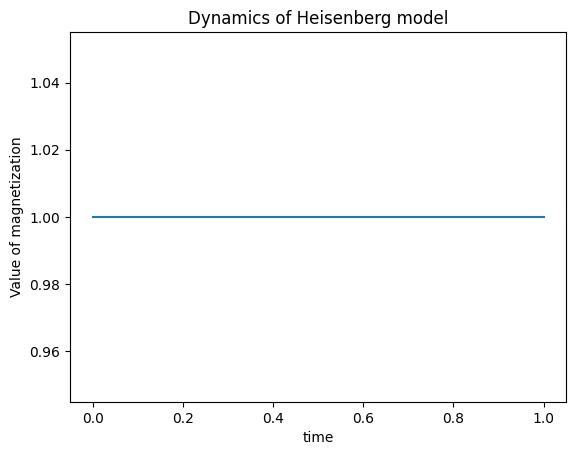

In [ ]:
circuit_trotter_heisenberg = QuantumCircuit(qubit_count=nqubits)

# 時間と磁化を記録するリスト
x = [i * delta for i in range(m + 1)]
y = []

# t = 0 の時の全磁化のみ先に計算
y.append(estimator(magnetization_op, state).value.real)

#t=0以降の全磁化を計算
for i in range(m):
    # delta = t / M だけ時間発展
    circuit_trotter_heisenberg.add_gate(e_xx_circuit)
    circuit_trotter_heisenberg.add_gate(e_yy_circuit)
    circuit_trotter_heisenberg.add_gate(e_zz_circuit)
    circuit_state = quantum_state(nqubits, circuit=circuit_trotter_heisenberg)
    # 磁化を計算して記録
    y.append(round(estimator(magnetization_op, circuit_state).value.real, 6))

# グラフの描画
plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of Heisenberg model")
plt.plot(x, y, "-")
plt.show()

この結果から分かるように、 $z$ 方向の全磁化 $m_z$ は一定になっています。つまりこの模型では $m_z$ が保存量になっていることがわかります。実際に確かめるためには、ハミルトニアン $H = J(X_0X_1 + Y_0Y_1+Z_0Z_1)$ と 全磁化の演算子 $\frac{1}{2}(Z_0 +Z_1)$ の交換関係を求めればわかります。興味のある方は各自で調べてみてください。

## QURI Partsを用いたトロッター・スズキ分解
ちなみに、今回はトロッター分解を直接行いましたが、QURI Partsではより一般化されたトロッター・スズキ分解が実装されており、使用することができます。一般のパウリ演算子の和 $P=\sum_i P_i$ に係数 $x$ をかけた演算子の指数関数 $e^{xP}$ に対するトロッター・スズキ分解は再帰的に次のように定義されます。
$$
S_{2k}(x)=[S_{2k-2}(p_kx)]^2S_{2k-2}((1-4p_k)x)[S_{2k-2}(p_kx)]^2.
$$

ここで

$$
S_2(x)=\prod_{j=1}^me^{P_j x /2}\prod_{j'=m}^1 e^{P_{j'} x /2},
$$

であり、 $p_k=(4-4^{1/(2k-1)})^{-1}$ です。近似は $k$ が大きくなるにつれ精度は良くなり、一般的に

$$
e^{-iHt}=\left(e^{-i\sum_k H_k\frac{t}{M}}\right)^M = S_{2k}\left(-it/M\right)^M + \mathcal{O}\left(\left(\frac{t}{M}\right)^{2k+1}\right)
$$

となることが知られています。以下のようにQURI Partsを使うことで簡単にトロッター・スズキ分解を行うことができます。

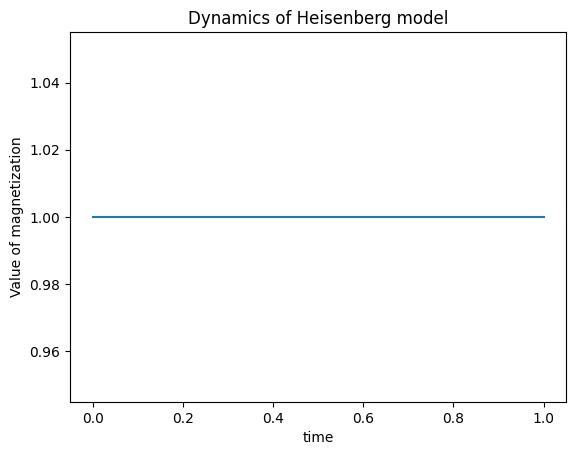

In [ ]:
from quri_parts.core.operator import trotter_suzuki_decomposition
from quri_parts.core.circuit.exp_single_pauli_gate import convert_exp_single_pauli_gate

# 今回は2スピン系なので2qubit系を考える。
nqubits = 2
# ハイゼンベルグ模型のパラメータ
J = -1
# ダイナミクスをシミュレーションする時間
t = 1.0
# トロッター・スズキ分解の分割数
m = 100
# 時間の刻み幅
delta = t / m

# トロッター・スズキ分解を適用するハミルトニアンを準備する。
hamiltonian = Operator({pauli_label(f"X0 X1"): J})
hamiltonian += Operator({pauli_label(f"Y0 Y1"): J})
hamiltonian += Operator({pauli_label(f"Z0 Z1"): J})

# トロッター・スズキ分解を行う。今回は k=2 とする。
decomposed_hamiltonian = trotter_suzuki_decomposition(hamiltonian, -1 * delta , 2)

# 出力は分解された各項のリストになっている。各項はパウリ演算子積の指数関数で、`ExponentialSinglePauli`というクラスとして表される。
# 各項は`convert_exp_single_pauli_gate()`を使うことで簡単にゲートに書き換えることができる。
gates = [convert_exp_single_pauli_gate(i.pauli, i.coefficient) for i in decomposed_hamiltonian]


circuit_trotter_suzuki_heisenberg = QuantumCircuit(qubit_count=nqubits)

# 時間と磁化を記録するリスト
x = [i * delta for i in range(m + 1)]
y = []

# t = 0 の時の全磁化のみ先に計算
y.append(estimator(magnetization_op, state).value.real)

#t=0以降の全磁化を計算
for i in range(m):
    # delta = t / M だけ時間発展
    circuit_trotter_suzuki_heisenberg.extend(gates)
    circuit_state = quantum_state(nqubits, circuit=circuit_trotter_suzuki_heisenberg)
    # 磁化を計算して記録
    y.append(round(estimator(magnetization_op, circuit_state).value.real, 6))

# グラフの描画
plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of Heisenberg model")
plt.plot(x, y, "-")
plt.show()

## 横磁場を加えた場合のハイゼンベルグ模型

これだけだと面白くないので、 $x$ 軸方向の一様な磁場をかけた横磁場ハイゼンベルグ模型を考えてみます。

$$
H = J(X_0X_1 + Y_0Y_1+Z_0Z_1) + h(X_0 + X_1).
$$

ここで $h$ は横磁場の強さを表す係数です。この場合にトロッター分解を行うと、先ほどの回路に $e^{-ih\frac{t}{M}X_0}e^{-ih\frac{t}{M}X_1}$ という項も加えて実装する必要があります。ただしこの場合は $RX$ ゲートを使うだけで実装できるので難しくはありません。

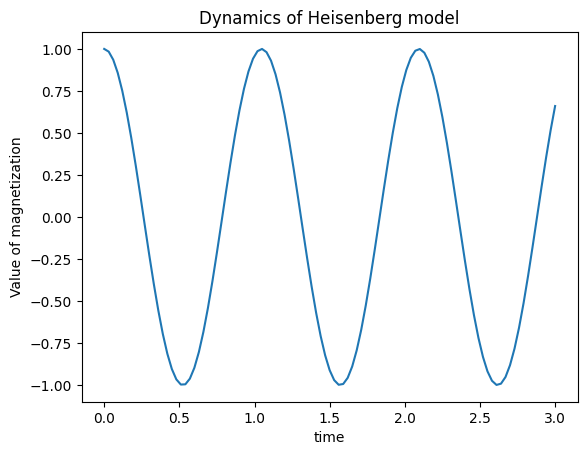

In [ ]:
# 同様に2qubit系を考える。
nqubits = 2
# ハイゼンベルグ模型のパラメータ
J = -1
# ダイナミクスをシミュレーションする時間
t = 3.0
# トロッター分解の分割数
m = 100
# 時間の刻み幅
delta = t / m

# 横磁場の強さ
h = 3

# estimator
estimator = create_qulacs_vector_estimator()

# 全磁化に対応するオペレーターを用意する。
magnetization_op = Operator()
for i in range(nqubits):
    magnetization_op += Operator({pauli_label(f"Z{i}"): 1 / 2})

# 初期状態 |00> を準備する。
state = quantum_state(n_qubits=nqubits, bits=0)

circuit_trotter_heisenberg = QuantumCircuit(qubit_count=nqubits)

# 時間と磁化を記録するリスト
x = [i * delta for i in range(m + 1)]
y = []

# t = 0 の時の全磁化のみ先に計算
y.append(estimator(magnetization_op, state).value.real)

# t = 0 以降の全磁化を計算
for i in range(m):
    # delta = t / Mだけ時間発展
    circuit_trotter_heisenberg.add_gate(e_xx_circuit)
    circuit_trotter_heisenberg.add_gate(e_yy_circuit)
    circuit_trotter_heisenberg.add_gate(e_zz_circuit)
    # 横磁場の効果を RX ゲートで表す
    circuit_trotter_heisenberg.add_RX_gate(index=0, angle=2 * h * delta)
    circuit_trotter_heisenberg.add_RX_gate(index=1, angle=2 * h * delta)
    circuit_state = quantum_state(nqubits, circuit=circuit_trotter_heisenberg)
    # 磁化を計算して記録
    y.append(estimator(magnetization_op, circuit_state).value.real)

# グラフの描画
plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of Heisenberg model")
plt.plot(x, y, "-")
plt.show()

$h = 0$ のハイゼンベルグ模型の場合は全磁化の値が一定だったのに対し、横磁場 $h = 3$ を入れた横磁場ハイゼンベルグ模型の場合は全磁化の値が $0$ 周りで振動しています。これは横磁場を加えたハミルトニアンと全磁化の演算子が可換でないことからもわかります。興味のある方は振動の物理的な描像を考えてみるのも、量子計算というより物理の問題ではありますが面白いと思います。

## Exercise 5

横磁場をかけた場合も、QURI Partsの`trotter_suzuki_decomposition()`関数使ってシミュレーションすることができます。シミュレーションを行って、トロッター分解と同じ結果が再現できていることを確認してみてください。

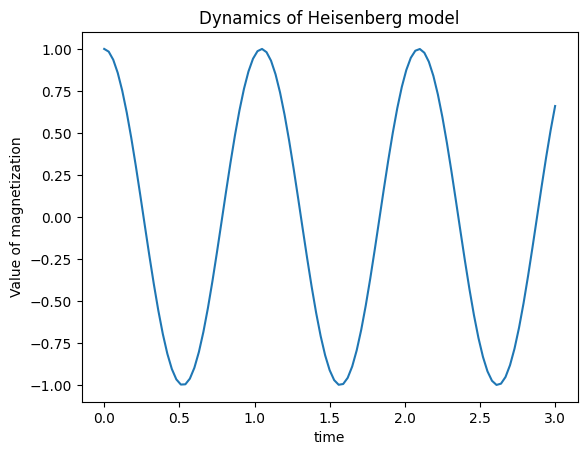

In [ ]:
# 2qubit系を考える。
nqubits = 2
# ハイゼンベルグ模型のパラメータ
J = -1
# ダイナミクスをシミュレーションする時間
t = 3.0
# トロッター・スズキ分解の分割数
m = 100
# 時間の刻み幅
delta = t / m

# 横磁場の強さ
h = 3

# トロッター・スズキ分解を適用するハミルトニアンを準備する。
hamiltonian = Operator({pauli_label("X0 X1"): J})
hamiltonian += Operator({pauli_label("Y0 Y1"): J})
hamiltonian += Operator({pauli_label("Z0 Z1"): J})
# 横磁場
hamiltonian += Operator({pauli_label("X0"): h}) + Operator({pauli_label("X1"): h})

# トロッター・スズキ分解を行う。今回は k=2 とする。
decomposed_hamiltonian = trotter_suzuki_decomposition(hamiltonian, -1 * delta , 2)

gates = [convert_exp_single_pauli_gate(i.pauli, i.coefficient) for i in decomposed_hamiltonian]

circuit_trotter_suzuki_heisenberg = QuantumCircuit(qubit_count=nqubits)

# 時間と磁化を記録するリスト
x = [i * delta for i in range(m + 1)]
y = []

# t = 0 の時の全磁化のみ先に計算
y.append(estimator(magnetization_op, state).value.real)

#t=0以降の全磁化を計算
for i in range(m):
    # delta = t / M だけ時間発展
    circuit_trotter_suzuki_heisenberg.extend(gates)
    circuit_state = quantum_state(nqubits, circuit=circuit_trotter_suzuki_heisenberg)
    # 磁化を計算して記録
    y.append(round(estimator(magnetization_op, circuit_state).value.real, 6))

# グラフの描画
plt.xlabel("time")
plt.ylabel("Value of magnetization")
plt.title("Dynamics of Heisenberg model")
plt.plot(x, y, "-")
plt.show()

# 第5章 位相推定

量子多体系のエネルギー計算や素因数分解、連立線型方程式といった様々な問題は、ユニタリ行列の固有値問題に帰着でき、量子位相推定アルゴリズム (QPE) によって、古典計算機と比較して非常に高速に解けるようになることが期待されています。

量子位相推定は、ユニタリ演算子$U$があたえられた時に、その固有値$e^{iλ}$の位相$λ$を求めるアルゴリズムです。この説明では、入力状態$|\psi⟩$を固有状態に限定して解説を行いますが、入力状態が固有状態の重ね合わせの場合でも同じ議論が行えるため、一般性は失われません。

$$U|\psi⟩ = e^{iλ}|\psi⟩$$

量子位相推定を行う量子回路は以下のように表されます。


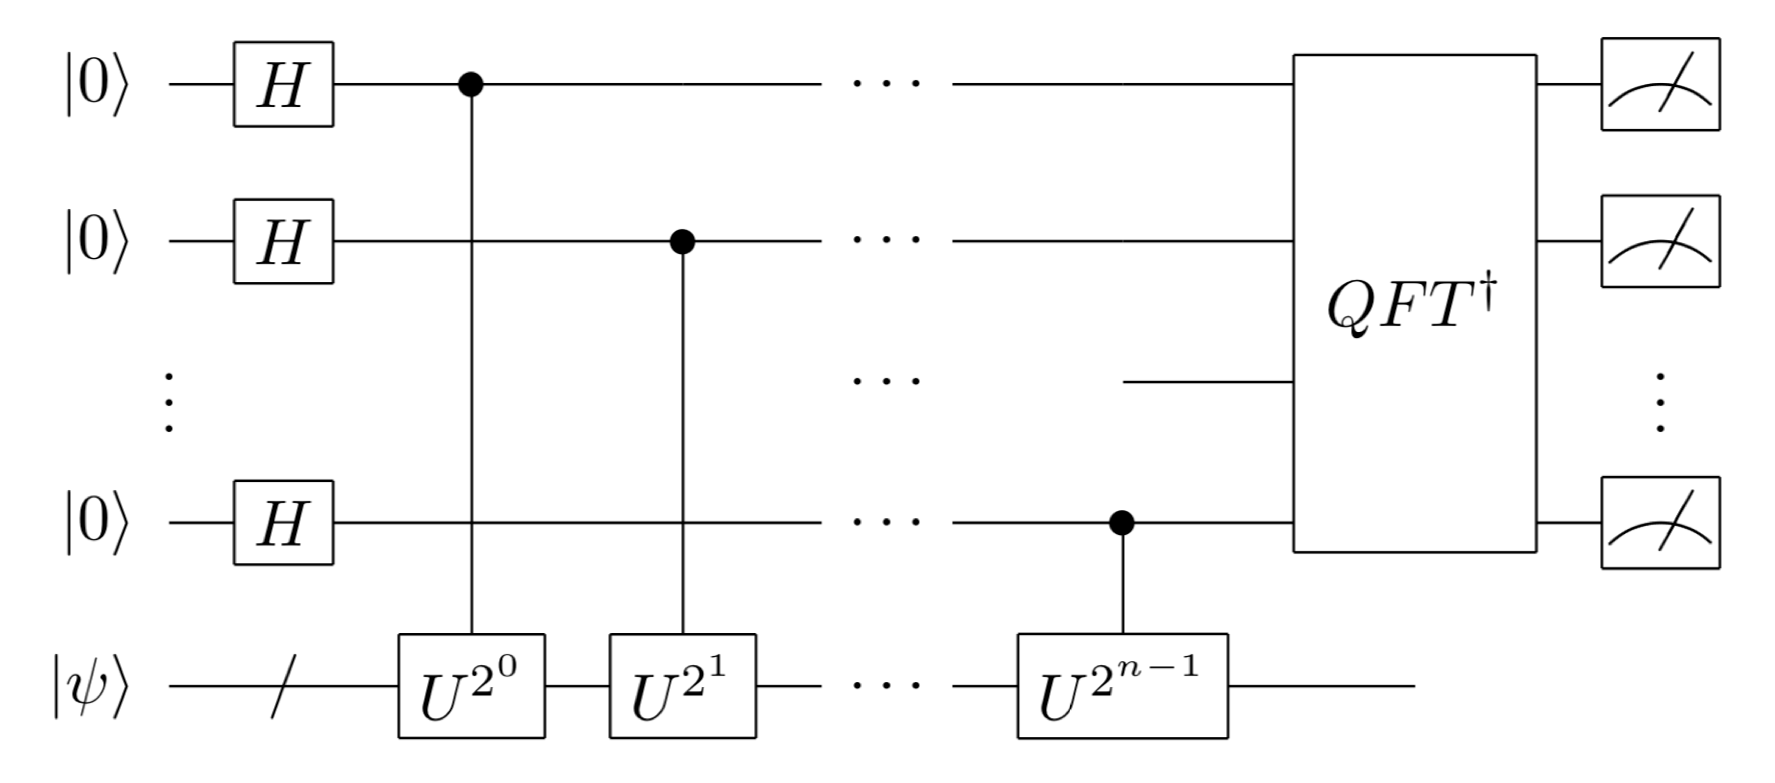

ユニタリ演算子$U$の固有値$e^{i\lambda}$について、位相$λ$の2進小数表現の各桁を$λ = (2\pi)0.j_1 j_2 … j_n$と表すと、位相推定回路によって１回の測定で$j_1,j_2,…,j_n$を求めることができます。

1. まず$|0⟩$に初期化されたn個の量子ビットにアダマールゲートHを作用させ、次に制御ユニタリ演算$U^{2^k} (k = 0,…,n-1)$を作用させます。k番目の量子ビットには、位相キックバックによって$e^{iλ2^k}$の位相が獲得され、以下のような状態が得られます。

$$\left(\frac{|0⟩ + e^{i (2\pi) 0.j_1…j_n} |1⟩}{\sqrt{2}}\right) \otimes \left(\frac{|0⟩ + e^{i (2\pi) 0.j_2…j_n} |1⟩}{\sqrt{2}}\right) \otimes … \otimes \left(\frac{|0⟩ + e^{i (2\pi) 0.j_n} |1⟩}{\sqrt{2}}\right) \otimes |λ⟩$$

2. 各補助量子ビットの状態は、量子フーリエ変換の結果と全く同じ形をしており、逆量子フーリエ変換をすることで、$|j_1…j_n⟩$が得られます。ノイズがない理想的な量子計算機では、この状態で1回の測定を行えば、$j_1,j_2,…,j_n$が求められます。

位相キックバックについては[Quantum Native Dojo 2-2](https://dojo.qulacs.org/ja/latest/notebooks/2.2_Hadamard_test.html)
、量子フーリエ変換については[Quantum Native Dojo 2-3](https://dojo.qulacs.org/ja/latest/notebooks/2.3_quantum_Fourier_transform.html)をご参照ください。

## Phaseゲートの位相推定

まずはシンプルな例を使って、位相推定回路が機能することを確認してみましょう。ここではターゲットのユニタリ演算子として、Phaseゲートを使用します。

$$
Phase =
\left(
\begin{matrix}
1 & 0 \\
0 & e^{iθ}
\end{matrix}
\right)
$$

Phaseゲートを制御Phaseゲートとして位相推定回路に埋め込むことで、$e^{iθ} = e^{i2πx}$の$x$の値を求めてみましょう。

最初に必要なライブラリをまとめてimportしておきます。

In [ ]:
from quri_parts.circuit import PauliRotation, QuantumCircuit
from quri_parts.core.operator import Operator, pauli_label
from quri_parts.core.state import quantum_state
from quri_parts.qulacs.estimator import create_qulacs_vector_estimator
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler

from math import pi

すべての補助量子ビットにHゲートを追加する関数を用意します。

In [ ]:
def add_h_gates(n: int, circuit: QuantumCircuit) -> None:
    for i in range(n):
        circuit.add_H_gate(i)

制御PhaseゲートをRZゲートとCNOTゲートの列に展開する関数を用意し、これを使って$U^{2^0}, U^{2^1}, …, U^{2^n}$を回路に追加する関数を用意します。任意のユニタリゲートを制御ユニタリゲートとして回路に埋め込むのは少し面倒ですね。将来的には制御ユニタリゲートを直接扱える機能もQURI Partsに追加される予定です。

In [ ]:
def add_control_phase(circuit: QuantumCircuit, q0: int, q1: int, theta: float) -> None:
    circuit.add_RZ_gate(q0, theta / 2)
    circuit.add_CNOT_gate(q0, q1)
    circuit.add_RZ_gate(q1, -theta / 2)
    circuit.add_CNOT_gate(q0, q1)
    circuit.add_RZ_gate(q1, theta / 2)


def add_cp_gates(n: int, circuit: QuantumCircuit, theta: float) -> None:

    for k in range(n):
        q0 = n
        for i in range(2 ** k):
            add_control_phase(circuit, k, q0, theta)

最後に、量子フーリエ変換の逆演算を行う回路を追加する関数を作成します。

In [ ]:
def add_qftdag_gates(n: int, circuit: QuantumCircuit) -> None:

    for k in range(n // 2):
        circuit.add_SWAP_gate(k, n - k - 1)

    for k in range(n):
        for i in range(k):
            add_control_phase(circuit, i, k, -pi / (2 ** (k - i)))
        circuit.add_H_gate(k)

これらの関数を使って、位相推定回路を作ってみましょう。ここでは、補助量子ビットの数nを4とし、求める位相xを1/4としてみます。回路はとても長くなっています。興味がある方はプリントしてみてください。

In [ ]:
n = 4
x = 1 / 4

circuit = QuantumCircuit(n + 1)

add_h_gates(n, circuit)
add_cp_gates(n, circuit, 2 * pi * x)
add_qftdag_gates(n, circuit)

Phaseゲートの固有状態$|1⟩$を入力状態として用意します。

In [ ]:
initial_state = quantum_state(n + 1, bits=1 << n)
circuit = initial_state.circuit + circuit

準備ができたので、回路を実行してみましょう。固有値が1つに定まっている場合、ノイズがない理想的な環境では、1回実行すれば100%の確率で正しい結果が得られますが、ここでは念の為1000回ほどサンプリングしてみます。

In [ ]:
sampler = create_qulacs_vector_sampler()
result = sampler(circuit, shots=1000)
print({bin(k): v for k, v in result.items()})  # 下位nビットを取り出しビット列としてプリント
mask = int("1" * n, 2)
print({(k & mask) / (2 ** n): v for k, v in result.items()})  # 結果を10進数に変換

{'0b10100': 1000}
{0.25: 1000}


ここでは下位4ビットが補助量子ビットに相当します。x = 1/4の2進数表現である0b0100が得られています。

もう少し精度を上げた計算もしてみましょう。ビット数n = 7、x = 0.421875として計算してみます。

In [ ]:
n = 7
x = 0.421875  # 1/4 + 1/8 + 1/32 + 1/64

circuit = QuantumCircuit(n + 1)

add_h_gates(n, circuit)
add_cp_gates(n, circuit, 2 * pi * x)
add_qftdag_gates(n, circuit)

initial_state = quantum_state(n + 1, bits=1 << n)
circuit = initial_state.circuit + circuit

sampler = create_qulacs_vector_sampler()
result = sampler(circuit, shots=1000)
print({bin(k): v for k, v in result.items()})  # 下位nビットを取り出しビット列としてプリント
mask = int("1" * n, 2)
print({(k & mask) / (2 ** n): v for k, v in result.items()})  # 結果を10進数に変換

{'0b10110110': 1000}
{0.421875: 1000}


期待通りの結果が得られているようです。

## ハイゼンベルグ模型での基底状態エネルギーの計算

### モデル

それでは具体的な例として、ハミルトニアンダイナミクスの章でも扱った1次元ハイゼンベルグ模型を取り上げて、量子位相推定によって基底状態エネルギーを計算してみましょう。このモデルのハミルトニアンは以下のようなものでした。

$$H = J(X_0 X_1 + Y_0 Y_1 + Z_0 Z_1)$$

基底エネルギーは厳密解が計算できます。デモンストレーション的ではありますが、量子位相推定によって、この厳密解が再現できることを確認してみましょう。

### 厳密対角化
今回考えるハミルトニアンは、 $4\times 4$ 行列なので簡単に対角化することができます。以下では位相推定して得られた固有値が厳密解と比較しやすくなるよう、$J = - \frac{\pi}{2}$ とします。対角化すると

$$
\left(
\begin{matrix}
- \frac{\pi}{2} & 0 & 0 & 0 \\
0 & - \frac{\pi}{2} & 0 & 0 \\
0 & 0 & - \frac{\pi}{2} & 0 \\
0 & 0 & 0 & \frac{3\pi}{2}
\end{matrix}
\right)
$$

となります。いま $J<0$ なので、基底状態は三重項を構成していて、基底エネルギーが $J$ で三重に縮退していることがわかります。（励起状態は一重項でエネルギーは $-3J$ となっています。）三重項を構成している基底状態は以下の通りです。

$$
|\uparrow\uparrow\rangle,\  \frac{1}{\sqrt{2}}(|\uparrow\downarrow\rangle+|\downarrow\uparrow\rangle),\  |\downarrow\downarrow\rangle.
$$

位相推定でハミルトニアンの固有値問題を解く際は、時間発展演算子 $U = e^{-iHτ}$ の固有値を求めることで、ハミルトニアンの固有値を求めます。$U$の固有値の位相には$2\pi$ の不定性があるので、 $[E_{\text{min}}, E_{\text{max}}]$ が例えば $[-\pi,\pi)$ に収まるように調整することで、固有値が一意に求められます。ここでは$\tau = 1/2$とすることで調整してみましょう。そうすると、位相推定では固有値を $λ = (2\pi)0.j_1 j_2 … j_n$ と書いた際の $j_1, j_2, … ,j_n$が得られるので、例えば初期状態に $|\uparrow\uparrow\rangle$ を選ぶと、$U$の固有値は$2\pi × 1/8$ となり、$1/8$ の2進数表示 $0.001$ に対応する $j_1 =0, j_2 =0, j_3 = 1, \dots$ が得られるはずです。


### 基底エネルギーの計算手順

量子位相推定を用いた基底エネルギーの計算手順は以下の通りです。

0. ハミルトニアンのサイズを対称性などを用いて削減する
1. ハミルトニアンの時間発展演算子$U = e^{-iHτ}$を精度よく近似する
2. 制御時間発展演算子を量子計算機で実行しやすいゲートセットに分解し実装する
3. 基底状態と十分重なりのある初期状態を準備する
4. 量子回路を実行し、エネルギー固有値を求める

それでは実際にハイゼンベルグ模型の基底エネルギーを、位相推定を用いて計算してみましょう。ハミルトニアンのサイズは $4\times4$ と十分小さいのでサイズの削減は考えないことにします。次に時間発展演算子 $U = e^{-iHτ}$ を精度よく近似する必要がありますが、ここではトロッター分解と呼ばれる手法を使います。
時間発展演算子にトロッター分解を用いると

$$
U_H(\tau) \approx \left(\exp{\left(-iJ\frac{t}{M}X_0X_1\right)}\exp{\left(-iJ\frac{t}{M}Y_0Y_1\right)}\exp{\left(-iJ\frac{t}{M}Z_0Z_1\right)}\right)^M
$$

と分解できます。今回は単純のため $M=1$ とし、時間発展演算子を次のように分解します。

$$
U_{H, \tau} = \exp{\left(-iJ\tau X_0X_1\right)}\exp{\left(-iJ\tau Y_0Y_1\right)}\exp{\left(-iJ\tau Z_0Z_1\right)}
$$

（モデルが単純な場合はこれでも良い精度で固有値が得られます。）各項のユニタリ演算子は量子コンピュータで実行できるゲートセットに分解できます。

あとは基底状態と十分重なりのある初期状態を準備する必要がありますが、ここでは少しズルをして初期状態として基底状態  $|\uparrow\uparrow\rangle$ を選びます。あとは位相推定を行い、固有値を求めるだけです。

Phaseゲートの位相推定の例でみたように、各ユニタリ演算子をコントロールゲートに変換する必要があります。

In [ ]:
def add_cu_gates(n: int, circuit: QuantumCircuit, phi: float, n_trotter_step: float = 1) -> None:
    q0, q1 = n, n + 1
    # n: system qubits
    for k in range(n):
        for i in range(2 ** k):
            for _ in range(n_trotter_step):

                # CU(X0 X1)
                circuit.add_H_gate(q0)
                circuit.add_H_gate(q1)
                circuit.add_CNOT_gate(q1, q0)
                circuit.add_RZ_gate(q0, phi)
                circuit.add_CNOT_gate(k, q0)
                circuit.add_RZ_gate(q0, -phi)
                circuit.add_CNOT_gate(k, q0)
                circuit.add_CNOT_gate(q1, q0)
                circuit.add_H_gate(q0)
                circuit.add_H_gate(q1)

                # CU(Y0 Y1)
                circuit.add_Sdag_gate(q0)
                circuit.add_Sdag_gate(q1)
                circuit.add_H_gate(q0)
                circuit.add_H_gate(q1)
                circuit.add_CNOT_gate(q1, q0)
                circuit.add_RZ_gate(q0, phi)
                circuit.add_CNOT_gate(k, q0)
                circuit.add_RZ_gate(q0, -phi)
                circuit.add_CNOT_gate(k, q0)
                circuit.add_CNOT_gate(q1, q0)
                circuit.add_H_gate(q0)
                circuit.add_H_gate(q1)
                circuit.add_S_gate(q0)
                circuit.add_S_gate(q1)

                # CU(Z0 Z1)
                circuit.add_CNOT_gate(q1, q0)
                circuit.add_RZ_gate(q0, phi)
                circuit.add_CNOT_gate(k, q0)
                circuit.add_RZ_gate(q0, -phi)
                circuit.add_CNOT_gate(k, q0)
                circuit.add_CNOT_gate(q1, q0)
    return circuit

あとはこれらを用いて位相推定を行います。ここでは補助量子ビットを3つ用意します。前述の通り、位相推定するユニタリ演算子 $U = e^{-iH\tau}$ は $2\pi$ の不定性があるので、ここでは$\tau = 1/2$とすることで、$[E_{\text{min}}, E_{\text{max}}]$ が $[-\pi,\pi)$ に収まるように調整します。

In [ ]:
# 補助量子ビット数
n = 3

# モデルパラメーター
J = -pi / 2
tau = 1 / 2
phi = tau * J

circuit = QuantumCircuit(n + 2)

# 初期状態を作る回路を準備。補助ビットは0, 入力状態は |11>
initial_state = quantum_state(n + 2, bits=0b11 << n)
initial_circuit = initial_state.circuit

# アダマールゲートを補助量子ビットに作用させる
add_h_gates(n, circuit)

# 時間発展演算子をコントロールゲートにして作用させる
add_cu_gates(n, circuit, phi)

# 逆フーリエ変換を行う
add_qftdag_gates(n, circuit)

# 初期状態回路と位相推定回路を組み合わせる。
circuit = initial_circuit + circuit

これで回路が準備できたので、あとは実際にサンプリングしてみましょう。

In [ ]:
sampler = create_qulacs_vector_sampler()
result = sampler(circuit, shots=1000)
print(result)
print({bin(k): v for k, v in result.items()})

Counter({25: 1000})
{'0b11001': 1000}


結果を見ると、ビット列 $11001$ が得られています。最初の $11$ は入力状態で、後ろの3つが得られた固有値を表しています。2進数表現で$001$、10進数表現では$1/8$なので、ハミルトニアンの固有値に直すと、$U = e^{-iH\tau}$より$\frac{2\pi \times 1/8}{-\tau} = -\frac{\pi}{2}$ となります。これは今考えているハミルトニアンの基底エネルギー$J = -\frac{\pi}{2}$と一致していることがわかります。

## Exercise 6

Phaseゲートの位相推定で、$x = \pi / 10$とした場合どうなるか試してみてください。また、10進数で3桁の精度を得るにはnを幾つにするべきか求めてみてください。


今回の講義、ハンズオンセッションについて簡単なアンケートを用意しました。お答えいただけると幸いです。

[アンケート](https://docs.google.com/forms/d/e/1FAIpQLSeq3g_dwRvwMqFYZXhm2wc0YX9cKLLMgFuYA1fXw8Zh8X2iYw/viewform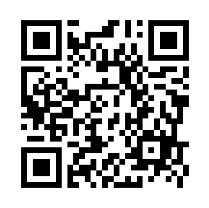)